In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import plotly.graph_objects as go
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from time import process_time 
from src.FunctionsProperties import *
import statsmodels.api as sm
mpl.rcParams['axes.linewidth'] = 1.4 #set the value globally

In [ ]:
# Create file with all samples


path = f"../../data/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/prop"
all_files = glob.glob(os.path.join(path,"*.csv"))

file_all = "/properties_set.txt"
file_names = "/filenames.txt"
short_lst = []
diameter_lst = []
ass_coeff_lst = []

print(f"N={N}, dim = {dim}, alpha_a = {alpha_a}, alpha_g = {alpha_g}")

count = 0
num_files = len(all_files)

# Open filenames (create if not exist)
filenames = open(path + file_names, 'w')  # Open the file (this will create it if it doesn't exist)


for File in all_files:
    with open(File, 'r') as file:
        lines = file.readlines()
        second_line = lines[1]
        all_properties = [float(i) for i in second_line.strip().split(',')]
        short_lst.append(all_properties[0])
        diameter_lst.append(all_properties[1])
        ass_coeff_lst.append(all_properties[2])
    count += 1
    print(f"{num_files} total files, {count} remaining files")
df_all = pd.DataFrame(data={"#short_path":short_lst, "#diamater":diameter_lst,"#ass_coeff":ass_coeff_lst})
df_all.to_csv(path + file_all, sep =  ' ', index = False, mode = 'w+')
clear_output()  # Set wait=True if you want to clear the output without scrolling the notebook

In [2]:
# Create folders to Results
make_results_folders()

In [9]:
# Create files and all_data
#N = [10000, 20000, 40000, 80000, df_all[df_all['N']==160000]['alpha_g'].unique()100000 ,160000, 320000]
#N = [10000, 20000, 40000, 80000, 100000, 160000]
N = [5000]
dim = [1, 2, 3, 4]
for n in N:
    for d in dim:
        all_combinations_ag =  extract_alpha_values(n, d)
        for i in range(len(all_combinations_ag)):
            all_properties_file(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])

all_data(N, dim, 2)

In [21]:
# Create files and all_data
#N = [10000, 20000, 40000, 80000, df_all[df_all['N']==160000]['alpha_g'].unique()100000 ,160000, 320000]
#N = [10000, 20000, 40000, 80000, 100000, 160000]
N = [5000]
dim = [1, 2, 3, 4]

for d in dim:
    all_combinations_ag =  extract_alpha_values(N[0], d)
    for i in range(len(all_combinations_ag)):
        all_properties_file(N[0], d, all_combinations_ag[i][0], all_combinations_ag[i][1])

all_data(N, dim, 3)

In [39]:
df_concat = pd.read_csv("../../data/all_data.txt",delimiter=' ')
df_1 = df_concat[df_concat["N"]==10000]
df_1[df_1["dim"]==1]

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,diameter_mean,diameter_err,ass_coeff_mean,ass_coeff_err
36,10000,1,21.0,2.0,51,16.900333,0.190208,41.254902,0.738224,0.061422,0.001100
37,10000,1,9.0,0.1,26,18.371081,0.231788,47.115385,0.613507,0.020923,0.001997
38,10000,1,7.0,9.0,26,18.282977,0.411932,43.153846,1.062207,0.043233,0.001599
39,10000,1,8.0,4.0,26,17.134085,0.164389,41.961538,0.814259,0.047191,0.001787
40,10000,1,3.0,1.0,26,14.898862,0.275534,36.307692,0.735410,0.007499,0.001858
...,...,...,...,...,...,...,...,...,...,...,...
518,10000,1,1.0,4.0,26,11.924088,0.195264,29.730769,0.510076,-0.083597,0.003717
519,10000,1,7.0,8.0,26,17.629500,0.365421,42.500000,1.280925,0.042796,0.001215
520,10000,1,1.0,2.0,1322,11.410909,0.021369,28.726172,0.061703,-0.081341,0.000525
521,10000,1,2.0,0.1,26,19.882942,0.619085,51.884615,1.498026,-0.073857,0.003497


In [22]:
#df_1 = pd.read_csv("../../data/all_data_3.txt",delimiter=' ')

In [25]:
#df_2 = pd.concat([df_concat, df_1], ignore_index=True)
#df_2.to_csv("../../data/all_data.txt",sep=' ', index=False)

In [7]:
df = pd.read_csv("../../data/all_data.txt", sep=' ')

In [23]:
a = df[df["N"]==20000]
a[a["alpha_g"]==2.0]

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,diameter_mean,diameter_err,ass_coeff_mean,ass_coeff_err
525,20000,1,9.0,2.0,373,17.699375,0.059456,43.458445,0.260868,0.052729,0.000294
528,20000,1,1.5,2.0,301,13.868334,0.052107,35.039867,0.176389,-0.040343,0.000662
529,20000,1,8.0,2.0,373,17.556183,0.068346,42.713137,0.279508,0.050679,0.000287
530,20000,1,14.0,2.0,51,18.180761,0.176375,44.882353,0.767296,0.059098,0.000705
535,20000,1,6.5,2.0,301,17.417104,0.073455,42.777409,0.339893,0.044568,0.000337
...,...,...,...,...,...,...,...,...,...,...,...
988,20000,1,5.5,2.0,301,17.137077,0.074349,42.325581,0.344649,0.039273,0.000364
994,20000,1,16.0,2.0,51,18.575078,0.220253,46.117647,0.937517,0.062621,0.000920
995,20000,1,36.0,2.0,51,18.302990,0.115358,43.686275,0.558352,0.067950,0.000906
997,20000,1,0.0,2.0,322,10.024707,0.028964,27.319876,0.099536,-0.048696,0.000585


In [13]:
df_filter = df_concat[df_concat["N"]!=100000]
df_filter_N5000 = df_filter[df_filter["N"]==5000]

# N = df_filter["N"].unique()

# true_lst = []

unique_aa_ag = df_filter_N5000[['alpha_a', 'alpha_g']].drop_duplicates()
# unique_aa_ag
unique_aa_ag['chave'] = unique_aa_ag['alpha_a'].astype(str) + '_' + unique_aa_ag['alpha_g'].astype(str)

# unique_aa_ag
df_filter_N10000 = df_filter[df_filter["N"]==20000]
df_filter_N10000 = df_filter_N10000[df_filter_N10000['dim']==1]
df_filter_N10000['chave'] = df_filter_N10000['alpha_a'].astype(str) + '_' + df_filter_N10000['alpha_g'].astype(str)

unique_aa_ag['present N10000'] = unique_aa_ag['chave'].isin(df_filter_N10000['chave'])
unique_aa_ag
# unique_aa_ag
# for j in range(len(unique_aa_ag)):
#     for i in range(len(N)):
#         df_to_N = df_filter[df_filter['N']==N[i]]
#         df_to_N_to_dim = df_to_N[df_to_N['dim']==1]
        
    

        


,alpha_a,alpha_g,chave,present N10000
0,2.0,3.0,2.0_3.0,True
1,2.0,4.0,2.0_4.0,True
2,2.0,6.0,2.0_6.0,True
4,2.0,7.0,2.0_7.0,True
5,2.0,2.0,2.0_2.0,True
6,2.0,5.0,2.0_5.0,True
7,2.0,9.0,2.0_9.0,True
8,2.0,8.0,2.0_8.0,True
9,2.0,1.0,2.0_1.0,True


In [37]:
df_filter['chave'] = df_filter['alpha_a'].astype(str) + '_' + df_filter['alpha_g'].astype(str)
df_filter

/tmp/ipykernel_6764/2126968627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['chave'] = df_filter['alpha_a'].astype(str) + '_' + df_filter['alpha_g'].astype(str)


,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,diameter_mean,diameter_err,ass_coeff_mean,ass_coeff_err,chave
1759,5000,4,2.0,1.0,20002,11.620496,0.013550,28.861614,0.028822,-0.117039,0.000231,2.0_1.0
1758,5000,4,2.0,8.0,20002,8.475112,0.003832,22.481202,0.012652,-0.078036,0.000113,2.0_8.0
1757,5000,4,2.0,9.0,20001,8.495861,0.003832,22.497825,0.012623,-0.077332,0.000112,2.0_9.0
1756,5000,4,2.0,5.0,20002,8.372122,0.003960,22.253125,0.012781,-0.082078,0.000118,2.0_5.0
1755,5000,4,2.0,2.0,20002,8.387326,0.005442,22.094541,0.013860,-0.097690,0.000154,2.0_2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1702,160000,3,2.0,2.0,13,11.825192,0.183518,32.923077,0.383331,-0.040408,0.003007,2.0_2.0
1718,160000,4,2.0,5.0,9,11.658378,0.203541,34.222222,0.521157,-0.023116,0.001694,2.0_5.0
1712,160000,4,5.0,2.0,31,14.723319,0.187539,38.225806,0.448917,-0.035590,0.001058,5.0_2.0
1713,160000,4,8.0,2.0,31,16.937074,0.144022,42.322581,0.383496,-0.006977,0.000814,8.0_2.0


In [39]:
combinacoes_unicas['presente_no_df2'] = combinacoes_unicas['chave'].isin(df_filter['chave'])
combinacoes_unicas

,alpha_a,alpha_g,chave,presente_no_df2
1759,2.0,1.0,2.0_1.0,True
1758,2.0,8.0,2.0_8.0,True
1757,2.0,9.0,2.0_9.0,True
1756,2.0,5.0,2.0_5.0,True
1755,2.0,2.0,2.0_2.0,True
...,...,...,...,...
185,7.0,3.0,7.0_3.0,True
184,3.0,6.0,3.0_6.0,True
183,1.0,5.0,1.0_5.0,True
182,18.0,2.0,18.0_2.0,True


In [3]:
alpha_a_filter = [round(i,2) for i in range(9)]
dimensions = [1,2,3,4]
beta_all(df_all, alpha_a_filter, dimensions)

/home/junior/Documents/TsallisNetwork/scripts/jupyter/src/FunctionsProperties.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sub_df = pd.concat([sub_df,join], axis=0)


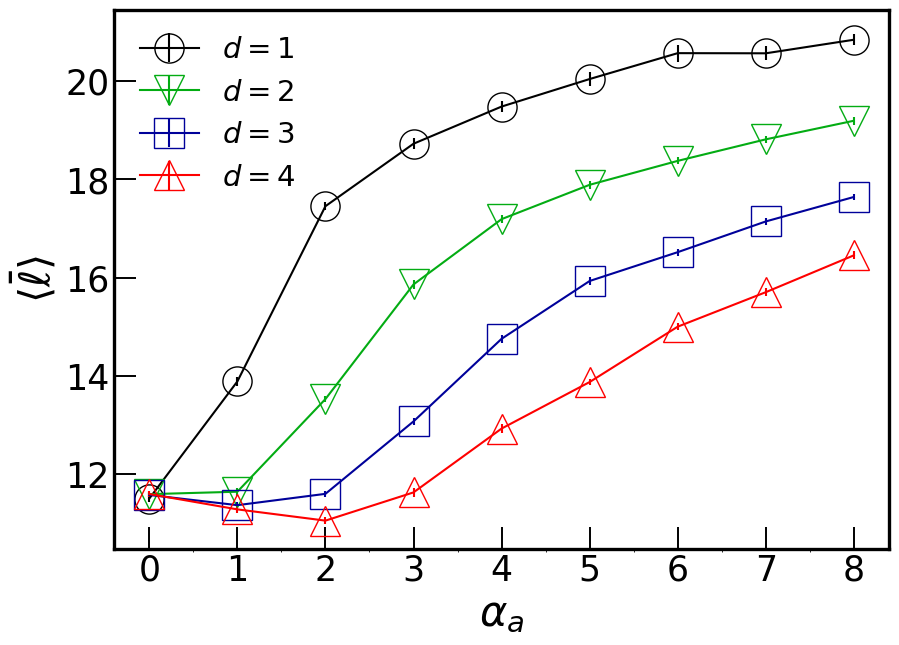

In [48]:
# SHORTEST_MEAN_PATH
# Plot to N = 10**5
df_filter = df_all[df_all["N"]==100000]
df_filter = df_filter[df_filter["alpha_g"]==2]
df_dim = df_filter[df_filter["dim"]==4].sort_values(by='alpha_a')

fig, ax = plt.subplots(figsize=(10, 7))
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', '^', 'D']
labels = [rf"$d = {i}$" for i in range(1,5)]
markersize = 21
thickness_axes = 1.4
dimensions = [1,2,3,4]
for d in range(len(dimensions)):
    df_dim = df_filter[df_filter["dim"]==dimensions[d]].sort_values(by='alpha_a')
    ax.errorbar(df_dim['alpha_a'], df_dim['short_mean'],
            yerr=df_dim['short_err'], linestyle='-', color=colors[d],
            marker=markers[d], markeredgecolor=colors[d], label=labels[d],
            markersize=markersize, markerfacecolor='none')
    #plt.plot(df_dim["alpha_a"], df_dim["short_mean"],'o')
plt.legend()
ax.tick_params('both', labelsize=22)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(.5))

# Set axis labels
ax.set_xlabel(r"$\alpha_a$", size=30)
ax.set_ylabel(r"$\langle \bar{\ell} \rangle $", size=30)

# Set legend and other parameters
ax.legend(prop={"size":21}, fancybox=True, framealpha=0.0)
ax.tick_params(which='major', width=thickness_axes, length=16, direction="in", labelsize=25)

# Set thickness for spines
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)
plt.show()

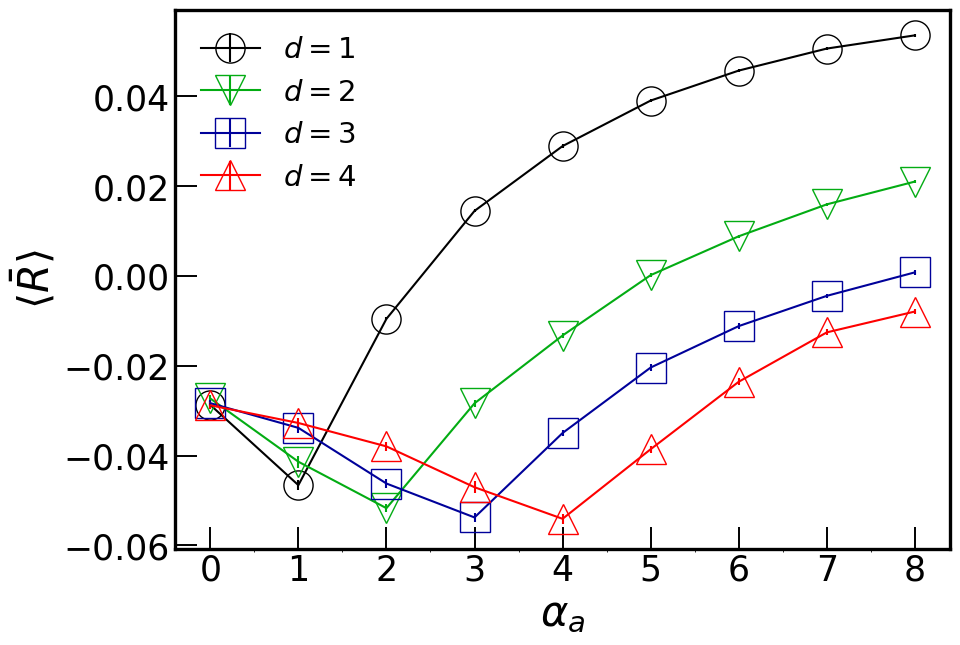

In [49]:
# ASS_COEFF_MEAN
# Plot to N = 10**5
df_filter = df_all[df_all["N"]==100000]
df_filter = df_filter[df_filter["alpha_g"]==2]
df_dim = df_filter[df_filter["dim"]==4].sort_values(by='alpha_a')

fig, ax = plt.subplots(figsize=(10, 7))
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', '^', 'D']
labels = [rf"$d = {i}$" for i in range(1,5)]
markersize = 21
thickness_axes = 1.4
dimensions = [1,2,3,4]
for d in range(len(dimensions)):
    df_dim = df_filter[df_filter["dim"]==dimensions[d]].sort_values(by='alpha_a')
    ax.errorbar(df_dim['alpha_a'], df_dim['ass_coeff_mean'],
            yerr=df_dim['ass_coeff_err'], linestyle='-', color=colors[d],
            marker=markers[d], markeredgecolor=colors[d], label=labels[d],
            markersize=markersize, markerfacecolor='none')
    #plt.plot(df_dim["alpha_a"], df_dim["short_mean"],'o')
plt.legend()
ax.tick_params('both', labelsize=22)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(.5))

# Set axis labels
ax.set_xlabel(r"$\alpha_a$", size=30)
ax.set_ylabel(r"$\langle \bar{R} \rangle $", size=30)

# Set legend and other parameters
ax.legend(prop={"size":21}, fancybox=True, framealpha=0.0)
ax.tick_params(which='major', width=thickness_axes, length=16, direction="in", labelsize=25)

# Set thickness for spines
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)
plt.show()

In [4]:
alpha_a = [round(i,2) for i in range(9)]
N = [10000, 20000, 40000, 80000, 100000]
dimensions = [1,2,3,4]
sub_df = pd.DataFrame(columns=df_all.columns)

for aa in alpha_a:
    join = df_all[(df_all['alpha_g'] == 2.0) & (df_all['alpha_a'] == aa)]
    sub_df = pd.concat([sub_df,join], axis=0)
sub_df.head()

/tmp/ipykernel_4436/1374611906.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sub_df = pd.concat([sub_df,join], axis=0)


,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,diameter_mean,diameter_err,ass_coeff_mean,ass_coeff_err
3,10000,1,0.0,2.0,1271,9.281426,0.013933,24.777341,0.050863,-0.060303,0.000376
125,10000,2,0.0,2.0,1271,9.294073,0.014745,24.788356,0.051805,-0.061090,0.000378
247,10000,3,0.0,2.0,1272,9.257706,0.014468,24.797956,0.050623,-0.060447,0.000374
369,10000,4,0.0,2.0,1271,9.281095,0.013955,24.768686,0.048353,-0.060569,0.000357
490,20000,1,0.0,2.0,322,10.024707,0.028964,27.319876,0.099536,-0.048696,0.000585


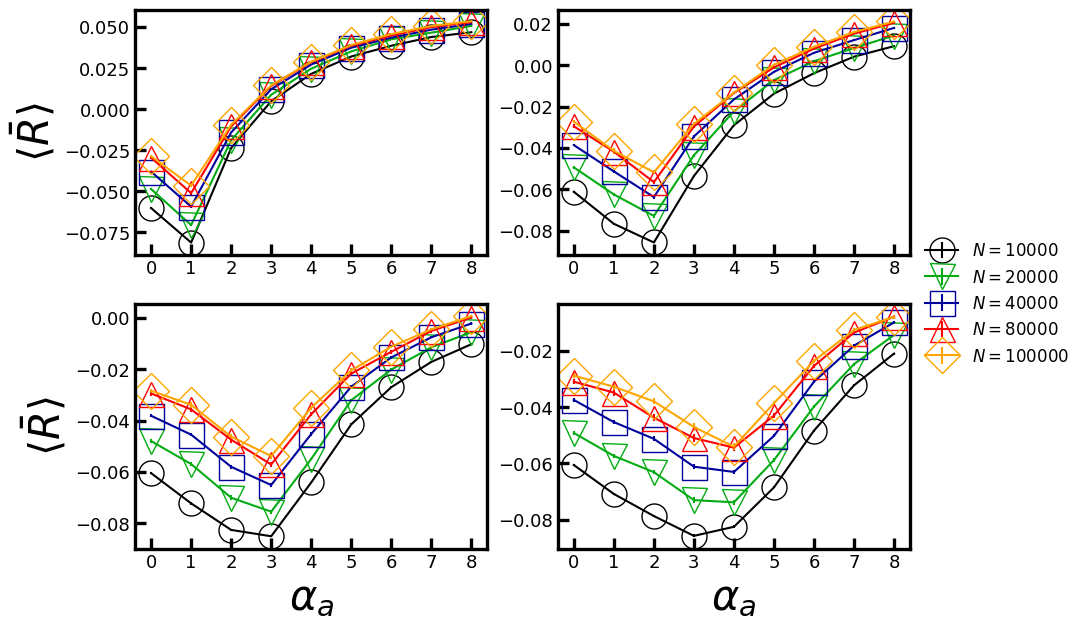

In [7]:
fig, ax = plt.subplots(2,2,figsize=(10, 7))
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-','-']
markers = ['o', 'v', 's', '^', 'D']
labels = [rf"$N = {i}$" for i in N]
markersize = 18
thickness_axes = 1.4


count = 0
ax_all = [(j, i) for j in range(2) for i in range(2)]

for (j, i) in ax_all:
    
    sub_dim = sub_df[sub_df['dim']==dimensions[count]]
    
    for n in range(len(N)):
    
        df_N = sub_dim[sub_dim['N']==N[n]]
        ax[j, i].errorbar(df_N['alpha_a'], df_N['ass_coeff_mean'],
            yerr=df_N['ass_coeff_err'], linestyle='-', color=colors[n],
            marker=markers[n], markeredgecolor=colors[n], label=labels[n],
            markersize=markersize, markerfacecolor='none')
        
        ax[j, i].tick_params('both', labelsize=13)
        ax[j, i].xaxis.set_major_locator(MultipleLocator(1))
        ax[j, i].xaxis.set_major_formatter('{x:.0f}')
        #ax[j, i].xaxis.set_minor_locator(MultipleLocator(.5))

        # Set legend and other parameters
        #ax[j, i].legend(prop={"size":21}, fancybox=True, framealpha=0.0)
        ax[j, i].tick_params(which='major', width=thickness_axes, length=8, direction="in", labelsize=13)

        # Set thickness for spines
        thickness_axes = 2.4
        for spine in ax[j, i].spines.values():
            spine.set_linewidth(thickness_axes)
    count +=1
ax[0,0].set_ylabel(r"$\langle \bar{R} \rangle $", size=30)
ax[1,0].set_ylabel(r"$\langle \bar{R} \rangle $", size=30)

ax[1,0].set_xlabel(r"$\alpha_a$", size=30)
ax[1,1].set_xlabel(r"$\alpha_a$", size=30)

plt.legend(prop={"size":12}, fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(1, 1))
plt.show()

In [5]:
count = 0    
sub_dim = sub_df[sub_df['dim']==dimensions[count]]
sub_alpha = sub_dim[sub_dim['alpha_a']==0.0]
#logN = [np.log10(i) for i in sub_alpha["N"]]
logN = np.log10(pd.to_numeric(sub_alpha['N']))
y = linear_regression(logN, sub_alpha['short_mean'], sub_alpha['short_err'],Parameter=False)
alpha_a_filter = [0.0, 1.0, 2.0, 4.0, 8.0]

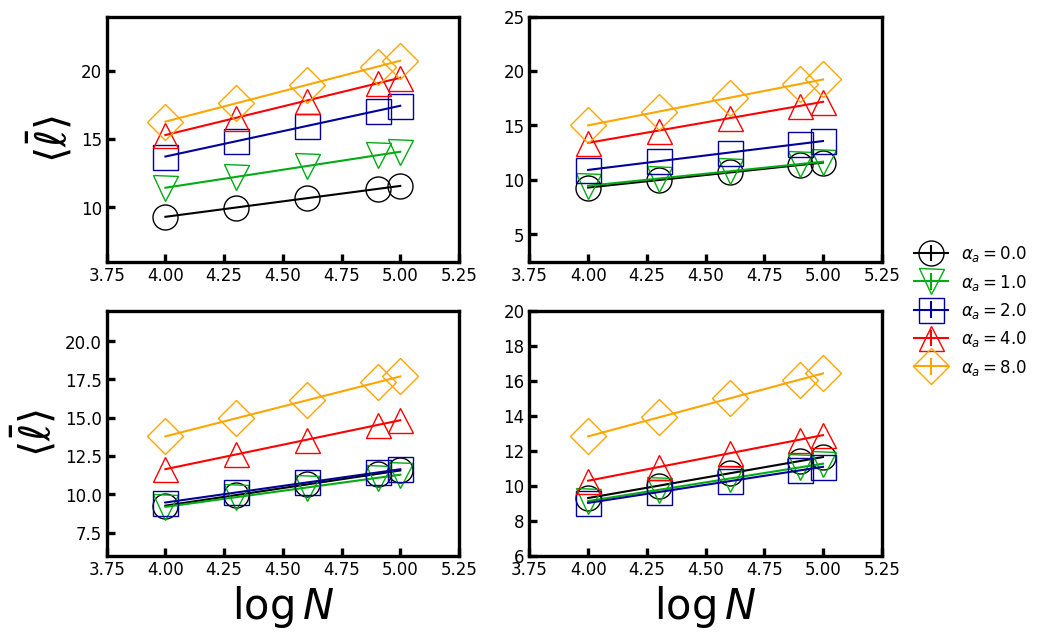

In [6]:
alpha_a_filter = [0.0, 1.0, 2.0, 4.0, 8.0]

fig, ax = plt.subplots(2,2,figsize=(10, 7))
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-','-']
markers = ['o', 'v', 's', '^', 'D']
labels = [rf"$\alpha_a = {i}$" for i in alpha_a_filter]
markersize = 18
thickness_axes = 1.4


count = 0
ax_all = [(j, i) for j in range(2) for i in range(2)]

for (j, i) in ax_all:
    
    sub_dim = sub_df[sub_df['dim']==dimensions[count]]
    
    for aa in range(len(alpha_a_filter)):
    
        df_alpha_a = sub_dim[sub_dim['alpha_a']==alpha_a_filter[aa]]
        
        logN = np.log10(pd.to_numeric(df_alpha_a['N']))
        
        prop = 'short_mean'
        
        if(prop=='short_mean'):
            err_prop = 'short_err'
            ylabel = r"$\langle \bar{\ell} \rangle $"
        
        elif(prop=='ass_coeff_mean'):
            err_prop='ass_coeff_err'
            ylabel = r"$\langle \bar{R} \rangle $"
        
        ax[j, i].errorbar(logN, linear_regression(logN, df_alpha_a[prop], df_alpha_a[err_prop],Parameter=False),
            yerr=df_alpha_a['ass_coeff_err'], linestyle='-', color=colors[aa],
            marker=markers[aa], markeredgecolor=colors[aa], label=labels[aa],
            markersize=markersize, markerfacecolor='none')
    
    
        ax[j, i].tick_params('both', labelsize=10)
    
        #ax[j, i].legend(prop={"size":21}, fancybox=True, framealpha=0.0)
        ax[j, i].tick_params(which='major', width=thickness_axes, length=6, direction="in", labelsize=12)
        ax[j, i].set_xlim([3.75, 5.25])
        # Set thickness for spines
        thickness_axes = 2.4
        for spine in ax[j, i].spines.values():
            spine.set_linewidth(thickness_axes)
        
    yticks = ax[j, i].get_yticks()
    xticks = ax[j, i].get_xticks()
    
    step = round(yticks[1]-yticks[0],3)
    yticks = np.insert(yticks,0,yticks[0]-step)
    yticks = np.insert(yticks,len(yticks),yticks[-1] + step)

    ax[i, j].set_ylim(yticks[0],yticks[-1])
    #print(yticks)
    count +=1

ax[0,0].set_ylabel(ylabel, size=30)
ax[1,0].set_ylabel(ylabel, size=30)

ax[1,0].set_xlabel(r"$\log{N}$", size=30)
ax[1,1].set_xlabel(r"$\log{N}$", size=30)

plt.legend(prop={"size":12}, fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(1.05, 1))
plt.show()

In [4]:
parms_all = pd.read_csv("../../data/parameters_all.txt", sep=' ')
parms_all.head()

,dim,alpha_a,alpha_g,beta_short,beta_short_err,xi_short,xi_short_err,beta_ass_coeff,beta_ass_coeff_err,xi_ass_coeff,xi_ass_coeff_err
0,1,0,2.0,2.269143,0.048949,0.213297,0.204695,0.033271,0.001854,-0.192851,0.008026
1,1,1,2.0,2.644462,0.099584,0.847752,0.417930,0.034770,0.000866,-0.220278,0.003761
2,1,2,2.0,3.728522,0.092916,-1.196165,0.392784,0.014317,0.000530,-0.080774,0.002397
3,1,3,2.0,3.924214,0.078813,-0.931965,0.331577,0.009885,0.000849,-0.034309,0.003825
4,1,4,2.0,4.207110,0.081254,-1.531046,0.340889,0.007748,0.000752,-0.009156,0.003371


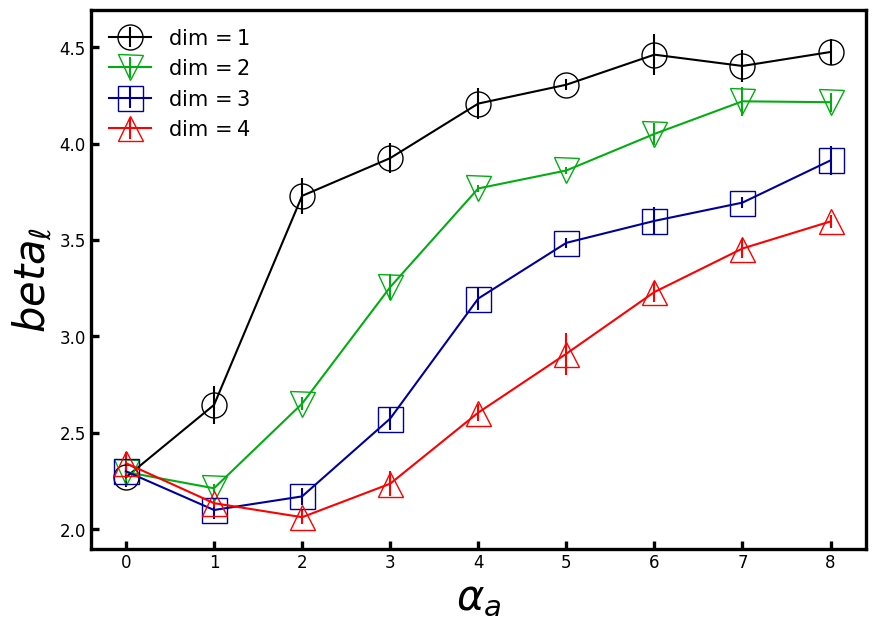

In [13]:
alpha_a_filter = [round(i,2) for i in range(9)]
dimensions = [1,2,3,4]
fig, ax = plt.subplots(figsize=(10, 7))
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-','-']
markers = ['o', 'v', 's', '^', 'D']
labels = [rf"$\dim = {i}$" for i in dimensions]
markersize = 18
thickness_axes = 1.4

count = 0
ax_all = [(j, i) for j in range(2) for i in range(2)]

for (j, i) in ax_all:
    
    sub_dim = parms_all[parms_all['dim']==dimensions[count]]
    
    #prop = 'beta_ass_coeff'
    prop = 'beta_short'
    
    if(prop=='beta_short'):
        err_prop = 'beta_short_err'
        ylabel = r"$beta_{\ell}$"
    
    elif(prop=='beta_ass_coeff'):
        err_prop='beta_ass_coeff_err'
        ylabel = r"$\beta_R$"
    
    ax.errorbar(sub_dim['alpha_a'], sub_dim[prop],
        yerr=sub_dim[err_prop], linestyle='-', color=colors[count],
        marker=markers[count], markeredgecolor=colors[count], label=labels[count],
        markersize=markersize, markerfacecolor='none')

    ax.tick_params('both', labelsize=10)

    #ax.legend(prop={"size":21}, fancybox=True, framealpha=0.0)
    ax.tick_params(which='major', width=thickness_axes, length=6, direction="in", labelsize=12)
    #ax.set_xlim([3.75, 5.25])
    # Set thickness for spines
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)
        
    #yticks = ax.get_yticks()
    #xticks = ax.get_xticks()
    
    #step = round(yticks[1]-yticks[0],3)
    #yticks = np.insert(yticks,0,yticks[0]-step)
    #yticks = np.insert(yticks,len(yticks),yticks[-1] + step)

    #ax.set_ylim(yticks[0],yticks[-1])
    #print(yticks)
    count +=1

ax.set_ylabel(ylabel, size=30)
ax.set_xlabel(r"$\alpha_a$", size=30)


plt.legend(prop={"size":15}, fancybox=True, framealpha=0.0)
#plt.legend(prop={"size":12}, fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(1.05, 1))
plt.show()

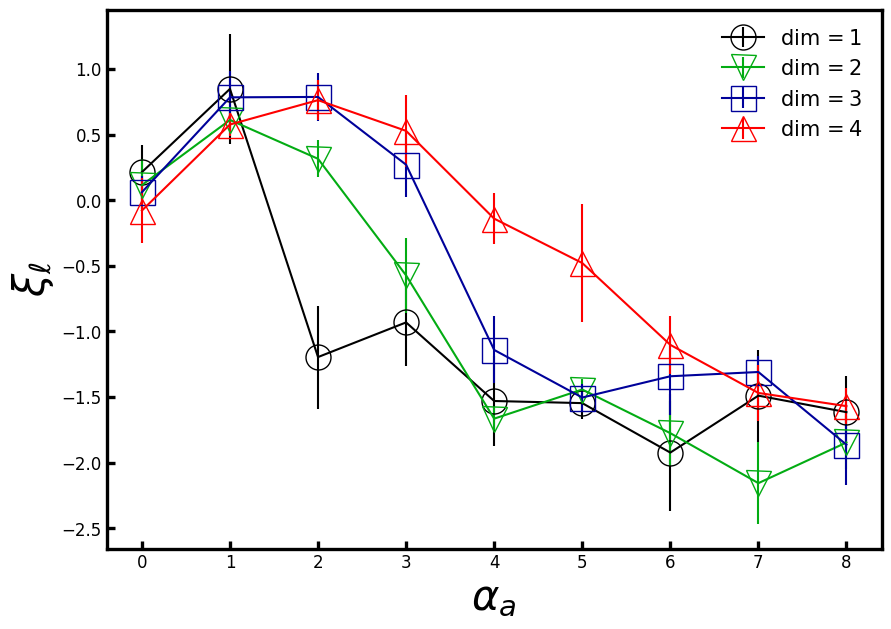

In [41]:
alpha_a_filter = [round(i,2) for i in range(9)]
dimensions = [1,2,3,4]
fig, ax = plt.subplots(figsize=(10, 7))
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-','-']
markers = ['o', 'v', 's', '^', 'D']
labels = [rf"$\dim = {i}$" for i in dimensions]
markersize = 18
thickness_axes = 1.4

count = 0
ax_all = [(j, i) for j in range(2) for i in range(2)]

for (j, i) in ax_all:
    
    sub_dim = parms_all[parms_all['dim']==dimensions[count]]
    
    #prop = 'xi_ass_coeff'
    prop = 'xi_short'
    
    if(prop=='xi_short'):
        err_prop = 'xi_short_err'
        ylabel = r"$\xi_{\ell}$"
    
    elif(prop=='xi_ass_coeff'):
        err_prop='xi_ass_coeff_err'
        ylabel = r"$\xi_R$"
    
    ax.errorbar(sub_dim['alpha_a'], sub_dim[prop],
        yerr=sub_dim[err_prop], linestyle='-', color=colors[count],
        marker=markers[count], markeredgecolor=colors[count], label=labels[count],
        markersize=markersize, markerfacecolor='none')

    ax.tick_params('both', labelsize=10)

    #ax.legend(prop={"size":21}, fancybox=True, framealpha=0.0)
    ax.tick_params(which='major', width=thickness_axes, length=6, direction="in", labelsize=12)
    #ax.set_xlim([3.75, 5.25])
    # Set thickness for spines
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)
        
    #yticks = ax.get_yticks()
    #xticks = ax.get_xticks()
    
    #step = round(yticks[1]-yticks[0],3)
    #yticks = np.insert(yticks,0,yticks[0]-step)
    #yticks = np.insert(yticks,len(yticks),yticks[-1] + step)

    #ax.set_ylim(yticks[0],yticks[-1])
    #print(yticks)
    count +=1

ax.set_ylabel(ylabel, size=30)
ax.set_xlabel(r"$\alpha_a$", size=30)


plt.legend(prop={"size":15}, fancybox=True, framealpha=0.0)
#plt.legend(prop={"size":12}, fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(1.05, 1))
plt.show()

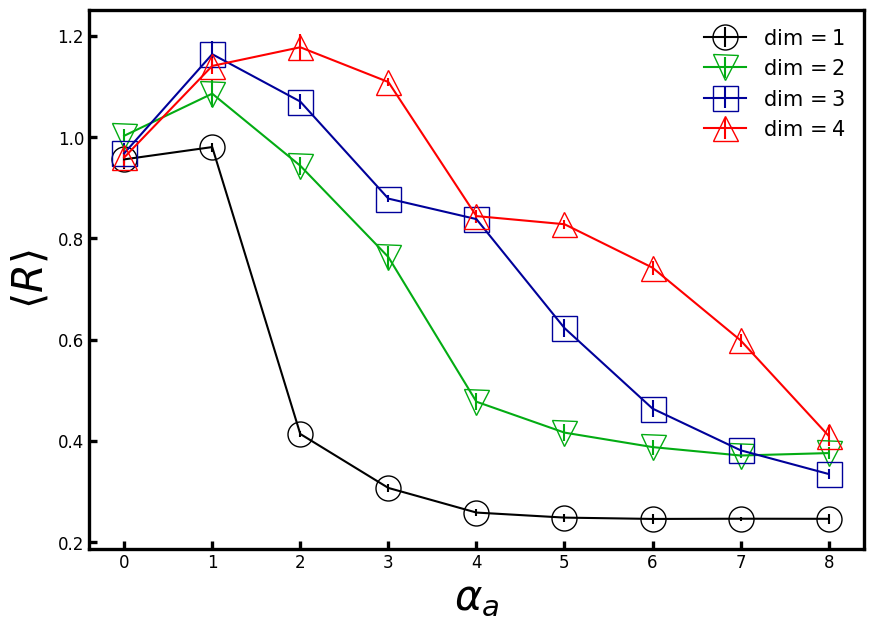

In [40]:
# prop = beta(alpha_a, alpha_g, dim) * ln(N) + xi(alpha_a, alpha_g, dim)

alpha_a_filter = [round(i,2) for i in range(9)]
dimensions = [1,2,3,4]
fig, ax = plt.subplots(figsize=(10, 7))
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-','-']
markers = ['o', 'v', 's', '^', 'D']
labels = [rf"$\dim = {i}$" for i in dimensions]
markersize = 18
thickness_axes = 1.4

count = 0
ax_all = [(j, i) for j in range(2) for i in range(2)]

for (j, i) in ax_all:
    
    sub_dim = parms_all[parms_all['dim']==dimensions[count]]
    
    prop = 'ass_coeff'
    #prop = 'short'
    
    if(prop=='short'):
        prop_name = 'beta_short'
        err_prop = 'beta_short_err'
    
        prop_name_2 = 'xi_short'
        err_prop_2 = 'xi_short_err'
        
        ylabel = r"$\langle \bar{\ell} \rangle$"
    
    elif(prop=='ass_coeff'):
        prop_name = 'beta_ass_coeff'
        err_prop = 'beta_ass_coeff_err'
    
        prop_name_2 = 'xi_ass_coeff'
        err_prop_2 = 'xi_ass_coeff_err'

        ylabel = r"$\langle R \rangle$"
    N = 10**15
    f = sub_dim[prop_name]*np.log(N) + sub_dim[prop_name_2]
    err_prop_tot = np.sqrt((sub_dim[err_prop]*np.log(10000))**2 + (sub_dim[err_prop_2])**2)
    
    ax.errorbar(sub_dim['alpha_a'], f,
        yerr=err_prop_tot, linestyle='-', color=colors[count],
        marker=markers[count], markeredgecolor=colors[count], label=labels[count],
        markersize=markersize, markerfacecolor='none')

    ax.tick_params('both', labelsize=10)

    #ax[j,i].legend(prop={"size":21}, fancybox=True, framealpha=0.0)
    ax.tick_params(which='major', width=thickness_axes, length=6, direction="in", labelsize=12)
    #ax[j,i].set_xlim([3.75, 5.25])
    # Set thickness for spines
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)
        
    #yticks = ax[j,i].get_yticks()
    #xticks = ax[j,i].get_xticks()
    
    #step = round(yticks[1]-yticks[0],3)
    #yticks = np.insert(yticks,0,yticks[0]-step)
    #yticks = np.insert(yticks,len(yticks),yticks[-1] + step)

    #ax[j,i].set_ylim(yticks[0],yticks[-1])
    #print(yticks)
    count +=1

ax.set_ylabel(ylabel, size=30)
ax.set_xlabel(r"$\alpha_a$", size=30)


plt.legend(prop={"size":15}, fancybox=True, framealpha=0.0)
#plt.legend(prop={"size":12}, fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(1.05, 1))
plt.show()

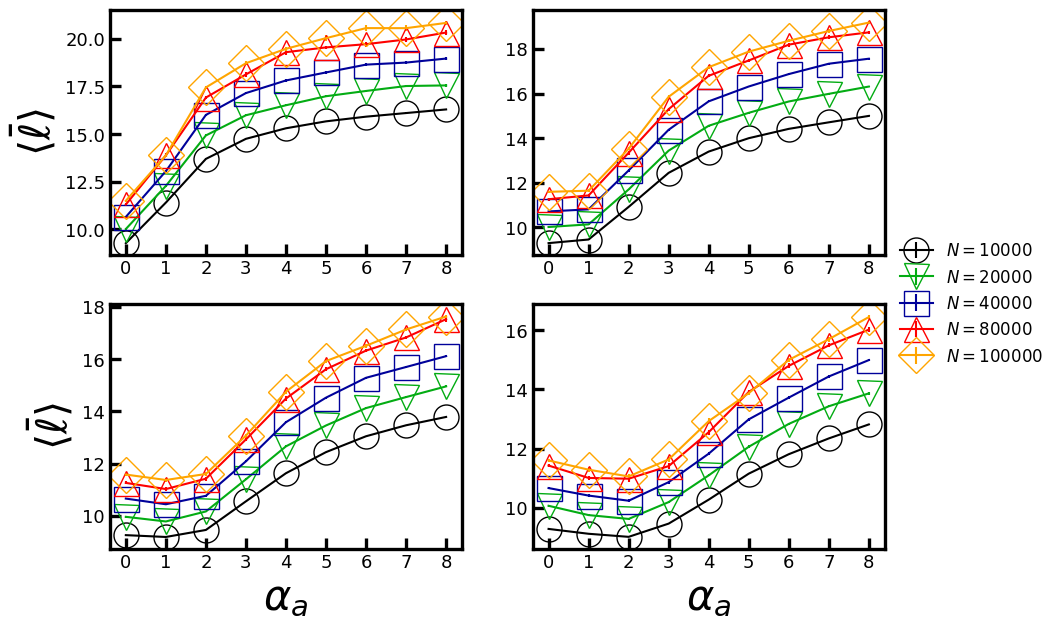

In [166]:
fig, ax = plt.subplots(2,2,figsize=(10, 7))
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-','-']
markers = ['o', 'v', 's', '^', 'D']
labels = [rf"$N = {i}$" for i in N]
markersize = 18
thickness_axes = 1.4
dimensions = [1,2,3,4]

count = 0
ax_all = [(j, i) for j in range(2) for i in range(2)]

for (j, i) in ax_all:
    
    sub_dim = sub_df[sub_df['dim']==dimensions[count]]
    
    for n in range(len(N)):
    
        df_N = sub_dim[sub_dim['N']==N[n]]
        ax[j, i].errorbar(df_N['alpha_a'], df_N['short_mean'],
            yerr=df_N['short_err'], linestyle='-', color=colors[n],
            marker=markers[n], markeredgecolor=colors[n], label=labels[n],
            markersize=markersize, markerfacecolor='none')
        
        ax[j, i].tick_params('both', labelsize=13)
        ax[j, i].xaxis.set_major_locator(MultipleLocator(1))
        ax[j, i].xaxis.set_major_formatter('{x:.0f}')


        # Set legend and other parameters
        #ax[j, i].legend(prop={"size":21}, fancybox=True, framealpha=0.0)
        ax[j, i].tick_params(which='major', width=thickness_axes, length=8, direction="in", labelsize=13)

        # Set thickness for spines
        thickness_axes = 2.4
        for spine in ax[j, i].spines.values():
            spine.set_linewidth(thickness_axes)
    count +=1
ax[0,0].set_ylabel(r"$\langle \bar{\ell} \rangle $", size=30)
ax[1,0].set_ylabel(r"$\langle \bar{\ell} \rangle $", size=30)

ax[1,0].set_xlabel(r"$\alpha_a$", size=30)
ax[1,1].set_xlabel(r"$\alpha_a$", size=30)

plt.legend(prop={"size":12}, fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
alpha_g = 2.0
alpha_a = [0.0, 2.0, 4.0, 6.0, 8.0]
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
dim = 2

for n in N:
    list_N = np.zeros(len(alpha_a))
    for i in range(len(alpha_a)):
        path = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a[i]}_alpha_g_{alpha_g}/prop"
        all_files = glob.glob(os.path.join(path, "*.csv"))
        list_N[i] = len(all_files)
    print(list_N)

In [ ]:
# [1102, 1296, 352, 242, 87, 111, 41] samples for networks with [5000, 10000, 20000, 40000, 80000, 160000, 320000] sites

In [ ]:
alpha_1d_f = [i for i in range(0,10)]
alpha_2d_f = [i*2 for i in range(0,10)]
alpha_3d_f = [i*3 for i in range(0,10)]
alpha_4d_f = [i*4 for i in range(0,10)]

scale_1d = []
scale_2d = []
scale_3d = []
scale_4d = []

for i in range(len(all_N_alpha_alpha_a_1)):
    cond_1 = all_N_alpha_alpha_a_1.iloc[i,0] in alpha_1d_f
    if(cond_1 == True):
        scale_1d.append(all_N_alpha_alpha_a_1.iloc[i,1])
for i in range(len(all_N_alpha_alpha_a_1)):
    cond_2 = all_N_alpha_alpha_a_2.iloc[i,0] in alpha_2d_f
    if(cond_2 == True):
        scale_2d.append(all_N_alpha_alpha_a_2.iloc[i,1])

for i in range(len(all_N_alpha_alpha_a_1)):
    cond_3 = all_N_alpha_alpha_a_3.iloc[i,0] in alpha_3d_f
    if(cond_3 == True):
        scale_3d.append(all_N_alpha_alpha_a_3.iloc[i,1])

for i in range(len(all_N_alpha_alpha_a_1)):
    cond_4 = all_N_alpha_alpha_a_4.iloc[i,0] in alpha_4d_f
    if(cond_4 == True):
        scale_4d.append(all_N_alpha_alpha_a_4.iloc[i,1])    


scale_1d = np.array(scale_1d)
scale_2d = np.array(scale_2d)
scale_3d = np.array(scale_3d)
scale_4d = np.array(scale_4d)

In [ ]:
s_trunc_1d = [alpha_m1_AV[0][i]/np.log((10**5)**scale_1d[i]) for i in range(len(alpha_m1_AV[0]))]
s_trunc_2d = [alpha_m2_AV[0][i]/np.log((10**5)**scale_2d[i]) for i in range(len(alpha_m2_AV[0]))]
s_trunc_3d = [alpha_m3_AV[0][i]/np.log((10**5)**scale_3d[i]) for i in range(len(alpha_m3_AV[0]))]
s_trunc_4d = [alpha_m4_AV[0][i]/np.log((10**5)**scale_4d[i]) for i in range(len(alpha_m4_AV[0]))]

In [ ]:
s_trunc_1d = [alpha_m1_AV[0][i]/np.log((10**5)**np.mean(scale_1d)) for i in range(len(alpha_m1_AV[0]))]
s_trunc_2d = [alpha_m2_AV[0][i]/np.log((10**5)**np.mean(scale_2d)) for i in range(len(alpha_m2_AV[0]))]
s_trunc_3d = [alpha_m3_AV[0][i]/np.log((10**5)**np.mean(scale_3d)) for i in range(len(alpha_m3_AV[0]))]
s_trunc_4d = [alpha_m4_AV[0][i]/np.log((10**5)**np.mean(scale_4d)) for i in range(len(alpha_m4_AV[0]))]

In [ ]:
s_trunc_1d = [alpha_m1_AV[0][i]/np.log((10**5)**np.median(sorted(scale_1d))) for i in range(len(alpha_m1_AV[0]))]
s_trunc_2d = [alpha_m2_AV[0][i]/np.log((10**5)**np.median(sorted(scale_2d))) for i in range(len(alpha_m2_AV[0]))]
s_trunc_3d = [alpha_m3_AV[0][i]/np.log((10**5)**np.median(sorted(scale_3d))) for i in range(len(alpha_m3_AV[0]))]
s_trunc_4d = [alpha_m4_AV[0][i]/np.log((10**5)**np.median(sorted(scale_4d))) for i in range(len(alpha_m4_AV[0]))]

In [ ]:
# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', '^', 'D']
labels = [rf"$d = {i}$" for i in range(1,5)]
markersize = 21
thickness_axes = 1.4
fig, ax = plt.subplots(figsize=(10, 7))


ax.errorbar(alpha_filter_1d, s_trunc_1d,
            yerr=alpha_m1_AV[1], linestyle='-', color=colors[0],
            marker=markers[0], markeredgecolor=colors[0], label=labels[0],
            markersize=markersize, markerfacecolor='none')


ax.errorbar(alpha_filter_1d, s_trunc_2d,
            yerr=alpha_m2_AV[1], linestyle='-', color=colors[1],
            marker=markers[1], markeredgecolor=colors[1], label=labels[1],
            markersize=markersize, markerfacecolor='none')


ax.errorbar(alpha_filter_1d, s_trunc_3d,
            yerr=alpha_m3_AV[1], linestyle='-', color=colors[2],
            marker=markers[2], markeredgecolor=colors[2], label=labels[2],
            markersize=markersize, markerfacecolor='none')


ax.errorbar(alpha_filter_1d, s_trunc_4d,
            yerr=alpha_m4_AV[1], linestyle='-', color=colors[3],
            marker=markers[3], markeredgecolor=colors[3], label=labels[3],
            markersize=markersize, markerfacecolor='none')

# Iterate over each dataset and plot with different color and linestyle
# for i, (data, label) in enumerate(zip([alpha_m1_AV, alpha_m2_AV, alpha_m3_AV, alpha_m4_AV], labels)):
#     ax.errorbar(data["#alpha_g"].values, data["#short_mean"].values,
#                 yerr=data["#short_err"].values, linestyle=linestyles[i], color=colors[i],
#                 marker=markers[i], markeredgecolor=colors[i], label=label,
#                 markersize=markersize, markerfacecolor='none')
# Set tick parameters and label size
ax.tick_params('both', labelsize=22)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(.5))

# Set axis labels
ax.set_xlabel(r"$\alpha_a/d$", size=30)
ax.set_ylabel(r"$\langle \ell \rangle $", size=30)

# Set legend and other parameters
ax.legend(prop={"size":21}, fancybox=True, framealpha=0.0)
ax.tick_params(which='major', width=thickness_axes, length=16, direction="in", labelsize=25)

# Set thickness for spines
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Set limits for axes
#ax.set_ylim([30,100])
ax.set_xlim([0.0,9.0])

# Show the plot
#plt.savefig("../../results/alpha_g/ag_ass_multiplesD.pdf",dpi=300)
plt.show()

In [ ]:
# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', '^', 'D']
labels = [rf"$d = {i}$" for i in range(1,5)]
markersize = 21
thickness_axes = 1.4
fig, ax = plt.subplots(figsize=(15, 10))


ax.errorbar(alpha_filter_1d, alpha_m1_AV[0],
            yerr=alpha_m1_AV[1], linestyle='-', color=colors[0],
            marker=markers[0], markeredgecolor=colors[0], label=labels[0],
            markersize=markersize, markerfacecolor='none')


ax.errorbar(alpha_filter_1d, alpha_m2_AV[0],
            yerr=alpha_m2_AV[1], linestyle='-', color=colors[1],
            marker=markers[1], markeredgecolor=colors[1], label=labels[1],
            markersize=markersize, markerfacecolor='none')


ax.errorbar(alpha_filter_1d, alpha_m3_AV[0],
            yerr=alpha_m3_AV[1], linestyle='-', color=colors[2],
            marker=markers[2], markeredgecolor=colors[2], label=labels[2],
            markersize=markersize, markerfacecolor='none')


ax.errorbar(alpha_filter_1d, alpha_m4_AV[0],
            yerr=alpha_m4_AV[1], linestyle='-', color=colors[3],
            marker=markers[3], markeredgecolor=colors[3], label=labels[3],
            markersize=markersize, markerfacecolor='none')

# Iterate over each dataset and plot with different color and linestyle
# for i, (data, label) in enumerate(zip([alpha_m1_AV, alpha_m2_AV, alpha_m3_AV, alpha_m4_AV], labels)):
#     ax.errorbar(data["#alpha_g"].values, data["#short_mean"].values,
#                 yerr=data["#short_err"].values, linestyle=linestyles[i], color=colors[i],
#                 marker=markers[i], markeredgecolor=colors[i], label=label,
#                 markersize=markersize, markerfacecolor='none')
# Set tick parameters and label size
ax.tick_params('both', labelsize=22)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(.5))

# Set axis labels
ax.set_xlabel(r"$\alpha_a/d$", size=30)
ax.set_ylabel(r"$\langle \ell \rangle $", size=30)

# Set legend and other parameters
ax.legend(prop={"size":21}, fancybox=True, framealpha=0.0)
ax.tick_params(which='major', width=thickness_axes, length=16, direction="in", labelsize=25)

# Set thickness for spines
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Set limits for axes
#ax.set_ylim([30,100])
ax.set_xlim([0.0,9.0])

# Show the plot
#plt.savefig("../../results/alpha_g/ag_ass_multiplesD.pdf",dpi=300)
plt.show()

In [ ]:
# Enable LaTeX rendering
plt.rcParams.update({
    "pgf.rcfonts": True
})

In [ ]:
color = ["black","#03AC13","#00019a","#fe0000","orange"]
#labels_title = ["d=1","d=2","d=3","d=4"]
labels = [rf"$\alpha_a$ = {i:.1f} " for i in alpha_a]
fmt = ["o","v","s","^","D"]
markersize=15
fig, ax = plt.subplots(2, 2,figsize=(15,10))
for i in range(len(alpha_a)):
    ax[0, 0].errorbar(np.log10(N_values),short_alpha_a_1d[i],yerr=err_short_1d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[0, 1].errorbar(np.log10(N_values),short_alpha_a_2d[i],yerr=err_short_2d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[1, 0].errorbar(np.log10(N_values),short_alpha_a_3d[i],yerr=err_short_3d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[1, 1].errorbar(np.log10(N_values),short_alpha_a_4d[i],yerr=err_short_4d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')

    ax[0, 0].plot(np.log10(N_values),linear_regression(np.log10(N_values), short_alpha_a_1d[i], err_short_1d[i], Parameter=False),color=color[i])
    ax[0, 1].plot(np.log10(N_values),linear_regression(np.log10(N_values), short_alpha_a_2d[i], err_short_2d[i], Parameter=False),color=color[i])
    ax[1, 0].plot(np.log10(N_values),linear_regression(np.log10(N_values), short_alpha_a_3d[i], err_short_3d[i], Parameter=False),color=color[i])
    ax[1, 1].plot(np.log10(N_values),linear_regression(np.log10(N_values), short_alpha_a_4d[i], err_short_4d[i], Parameter=False),color=color[i])

ax[0, 0].text(3.7, 22.5, r'$d$ = 1', style="normal" ,fontsize=17, bbox={'facecolor': color[0], 'alpha': .2, 'pad': 11})
ax[0, 1].text(3.7, 22.5, r'$d$ = 2', style="normal" ,fontsize=17, bbox={'facecolor': color[1], 'alpha': .2, 'pad': 11})
ax[1, 0].text(3.7, 22.5, r'$d$ = 3', style="normal" ,fontsize=17, bbox={'facecolor': color[2], 'alpha': .2, 'pad': 11})
ax[1, 1].text(3.7, 22.5, r'$d$ = 4', style="normal" ,fontsize=17, bbox={'facecolor': color[3], 'alpha': .2, 'pad': 11})


ax[0, 0].text(5.35, 7, '(a)', style="normal" ,fontsize=23)
ax[0, 1].text(5.35, 7, '(b)', style="normal" ,fontsize=23)
ax[1, 0].text(5.35, 7, '(c)', style="normal" ,fontsize=23)
ax[1, 1].text(5.35, 7, '(d)', style="normal" ,fontsize=23)

# ax[0, 0].text(np.log10(30000), 8.5, r'$\kappa$ = 0.30, q=1.33', style="normal" ,fontsize=17)
# ax[0, 1].text(np.log10(30000), 8.5, r'$\kappa$ = 0.30, q=1.33', style="normal" ,fontsize=17)
# ax[1, 0].text(np.log10(30000), 8.5, r'$\kappa$ = 0.30, q=1.33', style="normal" ,fontsize=17)
# ax[1, 1].text(np.log10(30000), 8.5, r'$\kappa$ = 0.30, q=1.33', style="normal" ,fontsize=17)

parts_of_graphic = ['top', 'bottom', 'left', 'right']
thickness_axes = 2.4

for i in range(2):
    for j in range(2):
        ax[1, i].set_xlabel(r"$\log_{10} N$",size=28)
        ax[i, 0].set_ylabel(r"$\langle \ell \rangle$",size=28)
        ax[i,j].set_ylim([5.0,25.0])
        #ax[i,j].set_ylim([5.0,30.0])
        #ax[i, j].legend(prop={"size":15},fancybox=True, framealpha=0.0)
        #ax[i, j].set_ylim([5,30])
        #ax[i, j].xaxis.set_minor_locator(MultipleLocator(.25))
        #ax[i, j].yaxis.set_minor_locator(MultipleLocator(2.5))
        
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        
        ax[i,j].tick_params(which='minor', width=thickness_axes, length=4,
                            direction="in",labelsize=21)
        ax[i,j].tick_params(which='major', width=thickness_axes, length=8,
                            direction="in",labelsize=21)
#fig.suptitle(r'$\langle \ell \rangle$ versus $N$ para $d$=(1,2,3,4), $\alpha_a$ variado', fontsize=30)
plt.savefig("../../results/N/short_N.jpeg",dpi=300)
plt.show()

In [ ]:
color = ["black","#03AC13","#00019a","#fe0000","orange"]
#labels_title = ["d=1","d=2","d=3","d=4"]
labels = [rf"$\alpha_a$ = {i:.1f} " for i in alpha_a]
fmt = ["o","v","s","^","D"]
markersize=15
fig, ax = plt.subplots(2, 2,figsize=(15,10))
for i in range(len(alpha_a)):
    ax[0, 0].errorbar(np.log10(N_values),diamater_alpha_a_1d[i],yerr=err_diamater_1d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[0, 1].errorbar(np.log10(N_values),diamater_alpha_a_2d[i],yerr=err_diamater_2d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[1, 0].errorbar(np.log10(N_values),diamater_alpha_a_3d[i],yerr=err_diamater_3d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[1, 1].errorbar(np.log10(N_values),diamater_alpha_a_4d[i],yerr=err_diamater_4d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')

    ax[0, 0].plot(np.log10(N_values),linear_regression(np.log10(N_values), diamater_alpha_a_1d[i], err_diamater_1d[i], Parameter=False),color=color[i])
    ax[0, 1].plot(np.log10(N_values),linear_regression(np.log10(N_values), diamater_alpha_a_2d[i], err_diamater_2d[i], Parameter=False),color=color[i])
    ax[1, 0].plot(np.log10(N_values),linear_regression(np.log10(N_values), diamater_alpha_a_3d[i], err_diamater_3d[i], Parameter=False),color=color[i])
    ax[1, 1].plot(np.log10(N_values),linear_regression(np.log10(N_values), diamater_alpha_a_4d[i], err_diamater_4d[i], Parameter=False),color=color[i])

ax[0, 0].text(3.7, 62.5, r'$d = 1$', style="normal" ,fontsize=17, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})
ax[0, 1].text(3.7, 62.5, r'$d = 2$', style="normal" ,fontsize=17, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})
ax[1, 0].text(3.7, 54.5, r'$d = 3$', style="normal" ,fontsize=17, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})
ax[1, 1].text(3.7, 54.5, r'$d = 4$', style="normal" ,fontsize=17, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})

# ax[0, 0].text(np.log10(30000), 8.5, r'$\kappa$ = 0.30, q=1.33', style="normal" ,fontsize=17)
# ax[0, 1].text(np.log10(30000), 8.5, r'$\kappa$ = 0.30, q=1.33', style="normal" ,fontsize=17)
# ax[1, 0].text(np.log10(30000), 8.5, r'$\kappa$ = 0.30, q=1.33', style="normal" ,fontsize=17)
# ax[1, 1].text(np.log10(30000), 8.5, r'$\kappa$ = 0.30, q=1.33', style="normal" ,fontsize=17)

parts_of_graphic = ['top', 'bottom', 'left', 'right']
thickness_axes = 2.4

ax[0, 0].set_ylim([10,70])
ax[0, 1].set_ylim([10,70])

ax[1, 0].set_ylim([20,60])
ax[1, 1].set_ylim([20,60])

ax[0, 0].text(5.35, 15, '(a)', style="normal" ,fontsize=23)
ax[0, 1].text(5.35, 15, '(b)', style="normal" ,fontsize=23)
ax[1, 0].text(5.35, 23, '(c)', style="normal" ,fontsize=23)
ax[1, 1].text(5.35, 23, '(d)', style="normal" ,fontsize=23)


for i in range(2):
    for j in range(2):
        ax[1, i].set_xlabel(r"$\log_{10} N$",size=28)
        ax[i, 0].set_ylabel(r"$\langle d_{max} \rangle$",size=28)
        #ax[i, j].legend(prop={"size":15},fancybox=True, framealpha=0.0)
        #ax[i, j].set_ylim([10,70])
        #ax[i, j].xaxis.set_minor_locator(MultipleLocator(.25))
        #ax[i, j].yaxis.set_minor_locator(MultipleLocator(5))
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        ax[i,j].tick_params(which='minor', width=thickness_axes, length=4,direction="in",labelsize=20)
        ax[i,j].tick_params(which='major', width=thickness_axes, length=8,direction="in",labelsize=20)
#fig.suptitle(r'$\langle d_{max} \rangle$ versus $N$ para $d$=(1,2,3,4), $\alpha_a$ variado', fontsize=30)
plt.savefig("../../results/N/d_max_N.jpeg",dpi=300)
plt.show()

In [ ]:
#labels_title = ["d=1","d=2","d=3","d=4"]
labels = [rf"$\alpha_a$ = {i:.1f} " for i in alpha_a]
fmt = ["o","v","s","^","D"]
color = ["black","#03AC13","#00019a","#fe0000","orange"]
markersize=15
fig, ax = plt.subplots(2, 2,figsize=(15,10))
markersize = 19

# ax[0, 0].plot(alpha_g,short[0],'o',color=color[0],markeredgecolor='black',label=labels[0],ls='',markersize=20)
# ax[0, 1].plot(alpha_g,short[1],'*',color=color[1],markeredgecolor='black',label=labels[1],ls='',markersize=20)
# ax[1, 0].plot(alpha_g,short[2],'^',color=color[2],markeredgecolor='black',label=labels[2],ls='',markersize=20)
# ax[1, 1].plot(alpha_g,short[3],'p',color=color[3],markeredgecolor='black',label=labels[3],ls='',markersize=20)
for i in range(len(alpha_a)):
    ax[0, 0].errorbar(np.log10(N_values),ass_alpha_a_1d[i],yerr=err_ass_1d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[0, 1].errorbar(np.log10(N_values),ass_alpha_a_2d[i],yerr=err_ass_2d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[1, 0].errorbar(np.log10(N_values),ass_alpha_a_3d[i],yerr=err_ass_3d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[1, 1].errorbar(np.log10(N_values),ass_alpha_a_4d[i],yerr=err_ass_4d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')

    ax[0, 0].plot(np.log10(N_values),linear_regression(np.log10(N_values), ass_alpha_a_1d[i], err_ass_1d[i], Parameter=False),color=color[i])
    ax[0, 1].plot(np.log10(N_values),linear_regression(np.log10(N_values), ass_alpha_a_2d[i], err_ass_2d[i], Parameter=False),color=color[i])
    ax[1, 0].plot(np.log10(N_values),linear_regression(np.log10(N_values), ass_alpha_a_3d[i], err_ass_3d[i], Parameter=False),color=color[i])
    ax[1, 1].plot(np.log10(N_values),linear_regression(np.log10(N_values), ass_alpha_a_4d[i], err_ass_4d[i], Parameter=False),color=color[i])

ax[0, 0].text(5.27, -.079, r'$d = 1$', style="normal",
              fontsize=17, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})

ax[0, 1].text(5.27, -.125, r'$d = 2$', style="normal" ,
              fontsize=17, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})

ax[1, 0].text(5.27, -.13, r'$d = 3$', style="normal" ,
              fontsize=17, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})

ax[1, 1].text(5.27, -.13, r'$d = 4$', style="normal" ,
              fontsize=17, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})

parts_of_graphic = ['top', 'bottom', 'left', 'right']
thickness_axes = 2.4

ax[0, 0].set_ylim([-0.1,.1])
ax[0, 1].set_ylim([-0.15,.1])

ax[1, 0].set_ylim([-0.15,.05])
ax[1, 1].set_ylim([-0.15,.05])

ax[0, 0].text(3.7, .068, '(a)', style="normal" ,fontsize=23)
ax[0, 1].text(3.7, .068, '(b)', style="normal" ,fontsize=23)
ax[1, 0].text(3.7, .02, '(c)', style="normal" ,fontsize=23)
ax[1, 1].text(3.7, .02, '(d)', style="normal" ,fontsize=23)

for i in range(2):
    for j in range(2):
        ax[1, j].set_xlabel(r"$\log_{10} N$",size=28)
        ax[i, 0].set_ylabel(r"$\langle R \rangle$",size=28)
        #ax[i, j].legend(prop={"size":14},fancybox=True, framealpha=0.0)
        #ax[i, j].set_ylim([-0.15,.15])
        #ax[i, j].set_xlim([3.5,5.0])
        #ax[i, j].xaxis.set_minor_locator(MultipleLocator(.125))
        #ax[i, j].yaxis.set_minor_locator(MultipleLocator(0.05))
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        ax[i,j].tick_params(which='minor', width=thickness_axes, length=4,direction="in",labelsize=18)
        ax[i,j].tick_params(which='major', width=thickness_axes, length=8,direction="in",labelsize=18)
        
#fig.suptitle(r'$\langle R \rangle $ versus $N$ para $d$=(1,2,3,4), $\alpha_a$ variado', fontsize=30)
#plt.savefig("../../results/N/R_N.jpeg",dpi=300)
plt.show()

In [ ]:
def Linear_regression(X,Y,Error_Y,Parameter):
    # Dados de exemplo
    x = X
    y = Y

    # Erros associados às medições no eixo y
    y_errors = Error_Y

    # Calcular a regressão linear ponderada
    coefficients, cov_matrix = np.polyfit(x, y, deg=1, w=1/y_errors, cov=True)

    # Extrair os coeficientes e as incertezas
    slope = coefficients[0]
    intercept = coefficients[1]
    slope_error = np.sqrt(cov_matrix[0, 0])
    intercept_error = np.sqrt(cov_matrix[1, 1])
    
    # Return a, b, a_err, b_err
    if( Parameter == True):
        return slope, intercept, slope_error, intercept_error
    # Return y, where y = a*x + b
    else:
        return intercept + slope*x
    

In [ ]:
Y = Linear_regression(np.log10(N_values), ass_alpha_a_2d[0], err_ass_2d[0], Parameter=False)
Y

In [ ]:
def t(x, a, b):
    return a*np.log10(x) + b

In [ ]:
parms = Linear_regression(np.log10(N_values), ass_alpha_a_1d[1], err_ass_1d[1], Parameter=True)

a, b = parms[0], parms[1]
a_err, b_err = parms[2], parms[3]

my_x = np.linspace(5000, 10**6, 100)
y_v = t(my_x, a, b)
# N_L: value where R transitions from negative to positive is 10^(-b/a).

# GPT error propagation, 
def error_propagation(a, b, sigma_a, sigma_b):
    c = 10**(-b/a)
    df_da = -(b / (a**2)) * c
    df_db = (1 / a) * c * np.log(10)
    sigma_c = np.sqrt((df_da * sigma_a)**2 + (df_db * sigma_b)**2)
    return c, sigma_c

a,a_err
#c, c_err = error_propagation(a, b, a_err, b_err)
#c, c_err

In [ ]:
x_L = 10**(-b/a)
x_L

In [ ]:
y_L = model(x_L, a, b)
y_L

In [ ]:
plt.plot(np.log10(my_x), y_v,'o')
plt.plot(np.log10(my_x), np.zeros(len(np.log10(my_x))),'-')
plt.plot( np.log10(x_L), y_L, 'p')
#plt.plot(np.log10(N_values),Y)
#plt.plot(np.log10(N_values), ass_alpha_a_2d[3],'o')
plt.show()

In [ ]:
def t(x, a, b):
    return a*np.log10(x) + b
x= [5000, 10000, 20000, 40000, 80000, 160000, 320000]
y = t(x, a, b)
y

In [ ]:
#labels_title = ["d=1","d=2","d=3","d=4"]
labels = [rf"$\alpha_a$ = {i:.1f} " for i in alpha_a]
fmt = ["o","v","s","^","D"]
color = ["black","#03AC13","#00019a","#fe0000","orange"]
markersize=15
fig, ax = plt.subplots(2, 2,figsize=(15,10))
markersize = 19

# ax[0, 0].plot(alpha_g,short[0],'o',color=color[0],markeredgecolor='black',label=labels[0],ls='',markersize=20)
# ax[0, 1].plot(alpha_g,short[1],'*',color=color[1],markeredgecolor='black',label=labels[1],ls='',markersize=20)
# ax[1, 0].plot(alpha_g,short[2],'^',color=color[2],markeredgecolor='black',label=labels[2],ls='',markersize=20)
# ax[1, 1].plot(alpha_g,short[3],'p',color=color[3],markeredgecolor='black',label=labels[3],ls='',markersize=20)
for i in range(len(alpha_a)):
    ax[0, 0].errorbar(ass_alpha_a_1d[i],np.log10(N_values),yerr=err_ass_1d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[0, 1].errorbar(ass_alpha_a_2d[i],np.log10(N_values),yerr=err_ass_2d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[1, 0].errorbar(ass_alpha_a_3d[i],np.log10(N_values),yerr=err_ass_3d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[1, 1].errorbar(ass_alpha_a_4d[i],np.log10(N_values),yerr=err_ass_4d[i],fmt=fmt[i],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')

    #ax[0, 0].plot(np.log10(N_values),linear_regression(np.log10(N_values), ass_alpha_a_1d[i], err_ass_1d[i], Parameter=False),color=color[i])
    #ax[0, 1].plot(np.log10(N_values),linear_regression(np.log10(N_values), ass_alpha_a_2d[i], err_ass_2d[i], Parameter=False),color=color[i])
    #ax[1, 0].plot(np.log10(N_values),linear_regression(np.log10(N_values), ass_alpha_a_3d[i], err_ass_3d[i], Parameter=False),color=color[i])
    #ax[1, 1].plot(np.log10(N_values),linear_regression(np.log10(N_values), ass_alpha_a_4d[i], err_ass_4d[i], Parameter=False),color=color[i])

ax[0, 0].plot(np.zeros(9),np.linspace(min(np.log10(N_values)),max(np.log10(N_values)),9),'b--')
ax[0, 1].plot(np.zeros(9),np.linspace(min(np.log10(N_values)),max(np.log10(N_values)),9),'b--')
ax[1, 0].plot(np.zeros(9),np.linspace(min(np.log10(N_values)),max(np.log10(N_values)),9),'b--')
ax[1, 1].plot(np.zeros(9),np.linspace(min(np.log10(N_values)),max(np.log10(N_values)),9),'b--')

# ax[0, 0].text(5.27, -.079, r'$d = 1$', style="normal",
#               fontsize=17, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})

# ax[0, 1].text(5.27, -.125, r'$d = 2$', style="normal" ,
#               fontsize=17, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})

# ax[1, 0].text(5.27, -.13, r'$d = 3$', style="normal" ,
#               fontsize=17, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})

# ax[1, 1].text(5.27, -.13, r'$d = 4$', style="normal" ,
#               fontsize=17, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})

parts_of_graphic = ['top', 'bottom', 'left', 'right']
thickness_axes = 2.4

# ax[0, 0].set_ylim([-0.1,.1])
# ax[0, 1].set_ylim([-0.15,.1])

# ax[1, 0].set_ylim([-0.15,.05])
# ax[1, 1].set_ylim([-0.15,.05])

# ax[0, 0].text(3.7, .06, '(a)', style="normal" ,fontsize=23)
# ax[0, 1].text(3.7, .06, '(b)', style="normal" ,fontsize=23)
# ax[1, 0].text(3.7, .02, '(c)', style="normal" ,fontsize=23)
# ax[1, 1].text(3.7, .02, '(d)', style="normal" ,fontsize=23)
#ax[0, 0].set_ylim([0.0,6.0])
for i in range(2):
    for j in range(2):
        ax[j, 0].set_ylabel(r"$\log_{10} N$",size=28)
        ax[1, i].set_xlabel(r"$\langle R \rangle$",size=28)
        #ax[i, j].legend(prop={"size":14},fancybox=True, framealpha=0.0)
        #ax[i, j].set_ylim([-0.15,.15])
        #ax[i, j].set_xlim([3.5,5.0])
        #ax[i, j].xaxis.set_minor_locator(MultipleLocator(.125))
        #ax[i, j].yaxis.set_minor_locator(MultipleLocator(0.05))
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        
        #ax[i,j].tick_params(which='minor', width=thickness_axes, length=4,direction="in",labelsize=18)
        #ax[i,j].tick_params(which='major', width=thickness_axes, length=8,direction="in",labelsize=18)
        
#fig.suptitle(r'$\langle R \rangle $ versus $N$ para $d$=(1,2,3,4), $\alpha_a$ variado', fontsize=30)
#plt.savefig("../../results/N/R_N.jpeg",dpi=300)
plt.show()

In [ ]:
q_values = [q(1.0,i) for i in np.arange(1,5)]
lambda_values = [Lambda(1.0,i) for i in np.arange(1,5)]
eta_values = [1/Lambda(1.0,i) for i in np.arange(1,5)]

In [ ]:
def filter_alpha_g(alpha_g, propertie, err_propertie):
    alpha_g_filter, propertie_filter,propertie_err_filter = [],[],[]
    
    for i in range(len(alpha_g)):
        if(alpha_g[i]>1.0):
            alpha_g_filter.append(alpha_g[i])
            propertie_filter.append(propertie[i])
            propertie_err_filter.append(err_propertie[i])
    alpha_g_filter, propertie_filter, propertie_err_filter = np.array(alpha_g_filter), np.array(propertie_filter), np.array(propertie_err_filter)
    return alpha_g_filter, propertie_filter, propertie_err_filter

In [ ]:
alpha_g_filter_1d, short_g_filter_1d,short_err_g_filter_1d = [],[],[]
alpha_g_filter_2d, short_g_filter_2d,short_err_g_filter_2d = [],[],[]
alpha_g_filter_3d, short_g_filter_3d,short_err_g_filter_3d = [],[],[]
alpha_g_filter_4d, short_g_filter_4d,short_err_g_filter_4d = [],[],[]

for i in range(len(prop_1d_gV["#short_mean"].values)):
    if(prop_1d_gV["#alpha_g"].values[i]>1.0):
        short_g_filter_1d.append(prop_1d_gV["#short_mean"].values[i])
        alpha_g_filter_1d.append(prop_1d_gV["#alpha_g"].values[i])
        short_err_g_filter_1d.append(prop_1d_gV["#short_err"].values[i])


for i in range(len(prop_2d_gV["#short_mean"].values)):
    if(prop_2d_gV["#alpha_g"].values[i]>1.0):
        short_g_filter_2d.append(prop_2d_gV["#short_mean"].values[i])
        alpha_g_filter_2d.append(prop_2d_gV["#alpha_g"].values[i])
        short_err_g_filter_2d.append(prop_2d_gV["#short_err"].values[i])

for i in range(len(prop_3d_gV["#short_mean"].values)):
    if(prop_3d_gV["#alpha_g"].values[i]>1.0):
        short_g_filter_3d.append(prop_3d_gV["#short_mean"].values[i])
        alpha_g_filter_3d.append(prop_3d_gV["#alpha_g"].values[i])
        short_err_g_filter_3d.append(prop_3d_gV["#short_err"].values[i])

for i in range(len(prop_4d_gV["#short_mean"].values)):
    if(prop_4d_gV["#alpha_g"].values[i]>1.0):
        short_g_filter_4d.append(prop_4d_gV["#short_mean"].values[i])
        alpha_g_filter_4d.append(prop_4d_gV["#alpha_g"].values[i])
        short_err_g_filter_4d.append(prop_4d_gV["#short_err"].values[i])

alpha_g_filter_1d, short_g_filter_1d,short_err_g_filter_1d = np.array(alpha_g_filter_1d), np.array(short_g_filter_1d),np.array(short_err_g_filter_1d)
alpha_g_filter_2d, short_g_filter_2d,short_err_g_filter_2d = np.array(alpha_g_filter_2d), np.array(short_g_filter_2d),np.array(short_err_g_filter_2d )
alpha_g_filter_3d, short_g_filter_3d,short_err_g_filter_3d = np.array(alpha_g_filter_3d), np.array(short_g_filter_3d),np.array(short_err_g_filter_3d )
alpha_g_filter_4d, short_g_filter_4d,short_err_g_filter_4d = np.array(alpha_g_filter_4d), np.array(short_g_filter_4d),np.array(short_err_g_filter_4d )

In [ ]:
a_1d,b_1d = linear_regression(alpha_g_filter_1d, short_g_filter_1d,short_err_g_filter_1d,Parameter=True)
a_2d,b_2d = linear_regression(alpha_g_filter_2d, short_g_filter_2d,short_err_g_filter_2d,Parameter=True)
a_3d,b_3d = linear_regression(alpha_g_filter_3d, short_g_filter_3d,short_err_g_filter_3d,Parameter=True)
a_4d,b_4d = linear_regression(alpha_g_filter_4d, short_g_filter_4d,short_err_g_filter_4d,Parameter=True)

In [ ]:
def legend_linear_label(a,b):
    return fr"$\langle \ell \rangle$={a:.3f}$\alpha_g$ + {b:.3f}"

In [ ]:
legend_linear_label(a_1d,b_1d)

In [ ]:
parts_of_graphic = ['top', 'bottom', 'left', 'right']

In [ ]:
# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', '^', 'D']
labels = [rf"$d = {i}$" for i in range(1,5)]
markersize = 21
thickness_axes = 1.4
fig, ax = plt.subplots(figsize=(15, 10))

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_gV, prop_2d_gV, prop_3d_gV, prop_4d_gV], labels)):
    ax.errorbar(data["#alpha_g"].values, data["#short_mean"].values,
                yerr=data["#short_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Set tick parameters and label size
ax.tick_params('both', labelsize=22)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(.5))

# Set axis labels
ax.set_xlabel(r"$\alpha_g$", size=30)
ax.set_ylabel(r"$\langle \ell \rangle $", size=30)

# Set legend and other parameters
ax.legend(prop={"size":21}, fancybox=True, framealpha=0.0)
ax.tick_params(which='major', width=thickness_axes, length=16, direction="in", labelsize=25)

# Set thickness for spines
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Set limits for axes
ax.set_ylim([10,40])
ax.set_xlim([0.0,9.0])

plt.savefig("../../results/alpha_g/ag_short_multiplesD.pdf",dpi=300)
# Show the plot
plt.show()

In [ ]:
# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', '^', 'D']
markersize = 21
labels = [rf"$d = {i}$" for i in range(1,5)]

fig, ax = plt.subplots(figsize=(15, 10))

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_gV, prop_2d_gV, prop_3d_gV, prop_4d_gV], labels)):
    ax.errorbar(data["#alpha_g"].values, data["#diamater_mean"].values,
                yerr=data["#diamater_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Set tick parameters and label size
ax.tick_params('both', labelsize=22)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(.5))

# Set axis labels
ax.set_xlabel(r"$\alpha_g$", size=30)
ax.set_ylabel(r"$\langle d_{max} \rangle $", size=30)

# Set legend and other parameters
ax.legend(prop={"size":21}, fancybox=True, framealpha=0.0)
ax.tick_params(which='major', width=thickness_axes, length=16, direction="in", labelsize=25)

# Set thickness for spines
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Set limits for axes
ax.set_ylim([30,100])
ax.set_xlim([0.0,9.0])

# Show the plot
plt.savefig("../../results/alpha_g/ag_d_max_multiplesD.pdf",dpi=300)
plt.show()

In [ ]:
# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', '^', 'D']
markersize = 21
labels = [rf"$d = {i}$" for i in range(1,5)]
fig, ax = plt.subplots(figsize=(15, 10))

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_gV, prop_2d_gV, prop_3d_gV, prop_4d_gV], labels)):
    ax.errorbar(data["#alpha_g"].values, data["#ass_coeff_mean"].values,
                yerr=data["#ass_coeff_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Set tick parameters and label size
ax.tick_params('both', labelsize=22)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(.5))

# Set axis labels
ax.set_xlabel(r"$\alpha_g$", size=30)
ax.set_ylabel(r"$\langle R \rangle $", size=30)

# Set legend and other parameters
ax.legend(prop={"size":21}, fancybox=True, framealpha=0.0)
ax.tick_params(which='major', width=thickness_axes, length=16, direction="in", labelsize=25)

# Set thickness for spines
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Set limits for axes
#ax.set_ylim([30,100])
ax.set_xlim([0.0,9.0])

# Show the plot
plt.savefig("../../results/alpha_g/ag_ass_multiplesD.pdf",dpi=300)
plt.show()

In [ ]:
# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', '^', 'D']
labels = [fr"$d = {i}$" for i in range(1,5)]
markersize = 21

fig, ax = plt.subplots(figsize=(15, 10))

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aV, prop_2d_aV, prop_3d_aV, prop_4d_aV], labels)):
    ax.errorbar(data["#alpha_a"].values, data["#short_mean"].values,
                yerr=data["#short_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Set tick parameters and label size
ax.tick_params('both', labelsize=22)
#ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_major_formatter('{x:.0f}')
#ax.xaxis.set_minor_locator(MultipleLocator(.5))

# Set axis labels
ax.set_xlabel(r"$\alpha_a$", size=30)
ax.set_ylabel(r"$\langle \ell \rangle $", size=30)

# Set legend and other parameters
ax.legend(prop={"size":21}, fancybox=True, framealpha=0.0, loc="lower right")
ax.tick_params(which='major', width=thickness_axes, length=16, direction="in", labelsize=25)

# Set thickness for spines
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Set limits for axes
ax.set_ylim([10,22])
ax.set_xlim([0.0,35])

# Show the plot
plt.savefig("../../results/alpha_a/L_multiplesD.pdf",dpi=300)
plt.show()

In [ ]:
#labels = [f"q = {q_values[i]:.2f}, $\kappa$ = {eta_values[i]:.2f}, $d$={i+1}" for i in range(len(lambda_values))]
labels = [f"$d$ = {i+1}" for i in range(len(lambda_values))]
fmt = ["o","v","s","^","D"]
fig, ax = plt.subplots(figsize=(10,8))
markersize=21
# ax.plot(alpha_g,short[0],'o',color=color[0],markeredgecolor='black',label=labels[0],ls='-')
# ax.plot(alpha_g,short[1],'*',color=color[1],markeredgecolor='black',label=labels[1],ls='-')
# ax.plot(alpha_g,short[2],'^',color=color[2],markeredgecolor='black',label=labels[2],ls='-')
# ax.plot(alpha_g,short[3],'p',color=color[3],markeredgecolor='black',label=labels[3],ls='-')

ax.errorbar(prop_1d_aV["#alpha_a"], prop_1d_aV["#short_mean"],yerr=prop_1d_aV["#short_err"],fmt=fmt[0],ecolor="k",markeredgecolor=color[0],label=labels[0],markersize=markersize,markerfacecolor='none')
ax.errorbar(prop_2d_aV["#alpha_a"], prop_2d_aV["#short_mean"],yerr=prop_2d_aV["#short_err"],fmt=fmt[1],ecolor="k",markeredgecolor=color[1],label=labels[1],markersize=markersize,markerfacecolor='none')
ax.errorbar(prop_3d_aV["#alpha_a"], prop_3d_aV["#short_mean"],yerr=prop_3d_aV["#short_err"],fmt=fmt[2],ecolor="k",markeredgecolor=color[2],label=labels[2],markersize=markersize,markerfacecolor='none')
ax.errorbar(prop_4d_aV["#alpha_a"], prop_4d_aV["#short_mean"],yerr=prop_4d_aV["#short_err"],fmt=fmt[3],ecolor="k",markeredgecolor=color[3],label=labels[3],markersize=markersize,markerfacecolor='none')

# ax.text(8.1, 21, 'd=1', style="normal" ,fontsize=15, bbox={'facecolor': color[0], 'alpha': 0.1, 'pad': 10})
# ax.text(8.1, 115, 'd=2', style="normal" ,fontsize=15, bbox={'facecolor': color[1], 'alpha': 0.1, 'pad': 10})
# ax.text(8.1, 96, 'd=3', style="normal" ,fontsize=15, bbox={'facecolor': color[2], 'alpha': 0.1, 'pad': 10})
# ax.text(8.1, 72, 'd=4', style="normal" ,fontsize=15, bbox={'facecolor': color[3], 'alpha': 0.1, 'pad': 10})



# Setting minor and major ticks
#ax.xaxis.set_minor_locator(MultipleLocator(.5))
#ax.set_xlim([-0.5,9.5])

# Setting minor and major ticks
ax.xaxis.set_minor_locator(MultipleLocator(.5))
ax.set_xlim([0.0,9.0])


# Setting label name axis
ax.set_xlabel(r"$\alpha_a$",size=30)
ax.set_ylabel(r"$\langle \ell \rangle$",size=30)

thickness_axes =  2.4

#ax.tick_params(which='minor', width=thickness_axes, length=8,direction="in",labelsize=25)
ax.tick_params(which='major', width=thickness_axes, length=16,direction="in",labelsize=25)

for i in parts_of_graphic:
    ax.spines[i].set_linewidth(thickness_axes)

#ax.legend(prop={"size":21},fancybox=True, framealpha=0.0)

#fig.suptitle(r'$\langle \ell \rangle$ versus $\alpha_a$ para $d$=(1,2,3,4),$N=10^5$', fontsize=30)
#plt.savefig("../../results/alpha_a/L_multiplesD_aux.jpeg",dpi=300)
#plt.show()

In [ ]:
# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', '^', 'D']
markersize = 21

fig, ax = plt.subplots(figsize=(15, 10))

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aV, prop_2d_aV, prop_3d_aV, prop_4d_aV], labels)):
    ax.errorbar(data["#alpha_a"].values, data["#diamater_mean"].values,
                yerr=data["#diamater_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Set tick parameters and label size
ax.tick_params('both', labelsize=22)
#ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_major_formatter('{x:.0f}')
#ax.xaxis.set_minor_locator(MultipleLocator(.5))

# Set axis labels
ax.set_xlabel(r"$\alpha_a$", size=30)
ax.set_ylabel(r"$\langle d_{max} \rangle $", size=30)

# Set legend and other parameters
ax.legend(prop={"size":21}, fancybox=True, framealpha=0.0)
ax.tick_params(which='major', width=thickness_axes, length=16, direction="in", labelsize=25)

# Set thickness for spines
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Set limits for axes
ax.set_ylim([30,60])
ax.set_xlim([0.0,35])

# Show the plot
plt.savefig("../../results/alpha_a/aa_d_max_multiplesD.pdf",dpi=300)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', '^', 'D']
markersize = 21

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(np.arange(0,38),np.zeros(38),'k--')
# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aV, prop_2d_aV, prop_3d_aV, prop_4d_aV], labels)):
    ax.errorbar(data["#alpha_a"].values, data["#ass_coeff_mean"].values,
                yerr=data["#ass_coeff_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Set tick parameters and label size
ax.tick_params('both', labelsize=22)
#ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_major_formatter('{x:.0f}')
#ax.xaxis.set_minor_locator(MultipleLocator(.5))

# Set axis labels
ax.set_xlabel(r"$\alpha_a$", size=30)
ax.set_ylabel(r"$\langle R \rangle $", size=30)

# Set legend and other parameters
ax.legend(prop={"size":21}, fancybox=True, framealpha=0.0)
ax.tick_params(which='major', width=thickness_axes, length=16, direction="in", labelsize=25)

# Set thickness for spines
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Set limits for axes
ax.set_ylim([-0.06,0.08])
ax.set_xlim([0.0,35])

# Show the plot
plt.savefig("../../results/alpha_a/R_alphaa.pdf",dpi=300)
plt.show()

In [ ]:
#labels_title = ["d=1","d=2","d=3","d=4"]
#labels = [f"q = {q_values[i]:.2f} $\kappa$ = {eta_values[i]:.2f}" for i in range(len(lambda_values))]
labels= [r"$d$ = 1","$d$ = 2","$d$ = 3","$d$ = 4"]
fmt = ["o","v","s","^","D"]
markersize=17
fig, ax = plt.subplots(2, 2,figsize=(15,10))

# ax[0, 0].plot(alpha_g,short[0],'o',color=color[0],markeredgecolor='black',label=labels[0],ls='',markersize=20)
# ax[0, 1].plot(alpha_g,short[1],'*',color=color[1],markeredgecolor='black',label=labels[1],ls='',markersize=20)
# ax[1, 0].plot(alpha_g,short[2],'^',color=color[2],markeredgecolor='black',label=labels[2],ls='',markersize=20)
# ax[1, 1].plot(alpha_g,short[3],'p',color=color[3],markeredgecolor='black',label=labels[3],ls='',markersize=20)
# Iterate over each dataset and plot with different color and linestyle
# for i, (data, label) in enumerate(zip([prop_1d_aV, prop_2d_aV, prop_3d_aV, prop_4d_aV], labels)):
#     ax.errorbar(data["#alpha_a"].values, data["#ass_coeff_mean"].values,
#                 yerr=data["#ass_coeff_err"].values, linestyle=linestyles[i], color=colors[i],
#                 marker=markers[i], markeredgecolor=colors[i], label=label,
#                 markersize=markersize, markerfacecolor='none')
ax[0, 0].errorbar(prop_1d_aV["#alpha_a"], prop_1d_aV["#ass_coeff_mean"],yerr=prop_1d_aV["#ass_coeff_err"],
                  fmt=fmt[0],ecolor="k",markeredgecolor=color[0], label=labels[0],markersize=markersize,
                  linestyle='-', color=color[0],markerfacecolor='none')

ax[0, 1].errorbar(prop_2d_aV["#alpha_a"], prop_2d_aV["#ass_coeff_mean"],yerr=prop_2d_aV["#ass_coeff_err"],
                  fmt=fmt[0],ecolor="k",markeredgecolor=color[1], label=labels[1],markersize=markersize,
                  linestyle='-', color=color[1],markerfacecolor='none')

ax[1, 0].errorbar(prop_3d_aV["#alpha_a"], prop_3d_aV["#ass_coeff_mean"],yerr=prop_3d_aV["#ass_coeff_err"],
                  fmt=fmt[0],ecolor="k",markeredgecolor=color[2], label=labels[2],markersize=markersize,
                  linestyle='-', color=color[2],markerfacecolor='none')

ax[1, 1].errorbar(prop_4d_aV["#alpha_a"], prop_4d_aV["#ass_coeff_mean"],yerr=prop_4d_aV["#ass_coeff_err"],
                  fmt=fmt[0],ecolor="k",markeredgecolor=color[3], label=labels[3],markersize=markersize,
                  linestyle='-', color=color[3],markerfacecolor='none')

# ax[0, 0].plot(alpha_g,dia[0],'o',color=color[0],markeredgecolor='black',label=labels[0],ls='')
# ax[0, 1].plot(alpha_g,dia[1],'*',color=color[1],markeredgecolor='black',label=labels[1],ls='')
# ax[1, 0].plot(alpha_g,dia[2],'^',color=color[2],markeredgecolor='black',label=labels[2],ls='')
# ax[1, 1].plot(alpha_g,dia[3],'p',color=color[3],markeredgecolor='black',label=labels[3],ls='')

ax[0, 0].axvspan(0, 1, color='red', alpha=0.25)
ax[0, 1].axvspan(0, 2, color='red', alpha=0.25)
ax[1, 0].axvspan(0, 3, color='red', alpha=0.25)
ax[1, 1].axvspan(0, 4, color='red', alpha=0.25)

thickness_axes =  2.4
ax[0, 0].set_ylim([-0.075,0.075])
ax[0, 1].set_ylim([-0.06,0.04])
ax[1, 0].set_ylim([-0.06,0.02])
ax[1, 1].set_ylim([-0.06,0.02])

for i in range(2):
    for j in range(2):
        ax[i, j].plot(np.arange(0,15),np.zeros(15),'k--')
        ax[1, j].set_xlabel(r"$\alpha_a$",size=30)
        ax[i, 0].set_ylabel(r"$\langle R\rangle$",size=30)
        ax[i, j].legend(prop={"size":21},fancybox=True, framealpha=1.0,loc="lower right")
        ax[i, j].xaxis.set_major_locator(MultipleLocator(1))
        #ax[i, j].xaxis.set_minor_locator(MultipleLocator(.5))
        #ax[i, j].xaxis.set_minor_locator(MultipleLocator(.5))
        ax[i, j].tick_params(which='minor', width=thickness_axes, length=8,direction="in",labelsize=20.5)
        ax[i, j].tick_params(which='major', width=thickness_axes, length=16,direction="in",labelsize=20.5)
        
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        ax[i, j].set_xlim([0,9.0])

#fig.suptitle(r'$\langle R\rangle$ versus $\alpha_a$ para $d$=(1,2,3,4),$N=10^5$', fontsize=30)
plt.savefig("../../results/alpha_a/R_alphaa.pdf",dpi=300)
plt.show()

In [ ]:
alpha_1d = pd.read_csv("../../data/properties_dim_1.csv",delimiter=',')
alpha_2d = pd.read_csv("../../data/properties_dim_2.csv",delimiter=',')
alpha_3d = pd.read_csv("../../data/properties_dim_3.csv",delimiter=',')
alpha_4d = pd.read_csv("../../data/properties_dim_4.csv",delimiter=',')

alpha_1d = alpha_1d.sort_values(by='alpha_a')
alpha_2d = alpha_2d.sort_values(by='alpha_a')
alpha_3d = alpha_3d.sort_values(by='alpha_a')
alpha_4d = alpha_4d.sort_values(by='alpha_a')

alpha_1d.to_csv("../../data/properties_dim_1.csv",sep=" ",index=False,mode="w")
alpha_2d.to_csv("../../data/properties_dim_2.csv",sep=" ",index=False,mode="w")
alpha_3d.to_csv("../../data/properties_dim_3.csv",sep=" ",index=False,mode="w")
alpha_4d.to_csv("../../data/properties_dim_4.csv",sep=" ",index=False,mode="w")

alpha_1d.head()

In [ ]:
#labels = [f"q = {q_values[i]:.2f}, $\kappa$ = {eta_values[i]:.2f}, d={i+1}" for i in range(len(lambda_values))]
labels = [f"$d$ = 1", f"$d$ = 2", f"$d$ = 3", f"$d$ = 4"]
fmt = ["o","v","s","^","D"]
fig, ax = plt.subplots(figsize=(15,10))
markersize = 21
# ax.plot(alpha_g,short[0],'o',color=color[0],markeredgecolor='black',label=labels[0],ls='-')
# ax.plot(alpha_g,short[1],'*',color=color[1],markeredgecolor='black',label=labels[1],ls='-')
# ax.plot(alpha_g,short[2],'^',color=color[2],markeredgecolor='black',label=labels[2],ls='-')
# ax.plot(alpha_g,short[3],'p',color=color[3],markeredgecolor='black',label=labels[3],ls='-')

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([alpha_1d, alpha_2d, alpha_3d, alpha_4d], labels)):
    ax.errorbar(data["alpha_a"].values, data["alpha_short"].values,
                yerr=data["alpha_short_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Setting minor and major ticks
#ax.xaxis.set_minor_locator(MultipleLocator(.5))
#ax.set_xlim([-0.5,9.5])

# Setting minor and major ticks
ax.xaxis.set_minor_locator(MultipleLocator(2.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_xlim([0.0,36])

# Setting label name axis
ax.set_xlabel(r"$\alpha_a$",size=30)
ax.set_ylabel(r"$\beta$",size=30)
ax.set_xlim([0,9.0])
ax.set_ylim([0.8,2.4])
ax.legend(prop={"size":21},fancybox=True, framealpha=0.0,loc="lower right")
thickness_axes =  2.4

#ax.tick_params(which='minor', width=thickness_axes, length=8,direction="in",labelsize=25)
ax.tick_params(which='major', width=thickness_axes, length=16,direction="in",labelsize=25)

for i in parts_of_graphic:
    ax.spines[i].set_linewidth(thickness_axes)
#ax.xaxis.set_minor_locator(MultipleLocator(.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.01))
#fig.suptitle(r'Coeficiente para o comprimento médio do menor caminho $\langle \ell \rangle$ ', fontsize=30)
#plt.savefig("../../results/alpha_a/coeff_short.pdf",dpi=300)
plt.show()

In [ ]:
#labels = [f"q = {q_values[i]:.2f}, $\kappa$ = {eta_values[i]:.2f}, d={i+1}" for i in range(len(lambda_values))]
labels = [f"$d$ = 1", f"$d$ = 2", f"$d$ = 3", f"$d$ = 4"]
fmt = ["o","v","s","^","D"]
fig, ax = plt.subplots(figsize=(15,10))
markersize = 21
# ax.plot(alpha_g,short[0],'o',color=color[0],markeredgecolor='black',label=labels[0],ls='-')
# ax.plot(alpha_g,short[1],'*',color=color[1],markeredgecolor='black',label=labels[1],ls='-')
# ax.plot(alpha_g,short[2],'^',color=color[2],markeredgecolor='black',label=labels[2],ls='-')
# ax.plot(alpha_g,short[3],'p',color=color[3],markeredgecolor='black',label=labels[3],ls='-')

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([alpha_1d, alpha_2d, alpha_3d, alpha_4d], labels)):
    ax.errorbar(data["alpha_a"].values, data["alpha_diameter"].values,
                yerr=data["alpha_diameter_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Setting minor and major ticks
#ax.xaxis.set_minor_locator(MultipleLocator(.5))
#ax.set_xlim([-0.5,9.5])

# Setting minor and major ticks
ax.xaxis.set_minor_locator(MultipleLocator(2.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_xlim([0.0,36])


# Setting label name axis
ax.set_xlabel(r"$\alpha_a$",size=30)
ax.set_ylabel(r"$\beta$",size=30)
ax.set_xlim([0,35])
ax.set_ylim([2.5,6.5])
ax.legend(prop={"size":21},fancybox=True, framealpha=0.0,loc="lower right")
thickness_axes =  2.4

#ax.tick_params(which='minor', width=thickness_axes, length=8,direction="in",labelsize=25)
ax.tick_params(which='major', width=thickness_axes, length=16,direction="in",labelsize=25)

for i in parts_of_graphic:
    ax.spines[i].set_linewidth(thickness_axes)
#ax.xaxis.set_minor_locator(MultipleLocator(.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.01))
#fig.suptitle(r'Coeficiente para o comprimento médio do menor caminho $\langle d_{max} \rangle$ ', fontsize=30)
plt.savefig("../../results/alpha_a/coeff_dia.pdf",dpi=300)
plt.show()

In [ ]:
#labels = [f"q = {q_values[i]:.2f}, $\kappa$ = {eta_values[i]:.2f}, d={i+1}" for i in range(len(lambda_values))]
labels = [f"$d$ = 1", f"$d$ = 2", f"$d$ = 3", f"$d$ = 4"]
fmt = ["o","v","s","^","D"]
fig, ax = plt.subplots(figsize=(15,10))
markersize = 21
# ax.plot(alpha_g,short[0],'o',color=color[0],markeredgecolor='black',label=labels[0],ls='-')
# ax.plot(alpha_g,short[1],'*',color=color[1],markeredgecolor='black',label=labels[1],ls='-')
# ax.plot(alpha_g,short[2],'^',color=color[2],markeredgecolor='black',label=labels[2],ls='-')
# ax.plot(alpha_g,short[3],'p',color=color[3],markeredgecolor='black',label=labels[3],ls='-')

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([alpha_1d, alpha_2d, alpha_3d, alpha_4d], labels)):
    ax.errorbar(data["alpha_a"].values, data["alpha_assortativity"].values,
                yerr=data["alpha_assortativity_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Setting minor and major ticks
#ax.xaxis.set_minor_locator(MultipleLocator(.5))
#ax.set_xlim([-0.5,9.5])

# Setting minor and major ticks
ax.xaxis.set_minor_locator(MultipleLocator(2.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

# Setting label name axis
ax.set_xlabel(r"$\alpha_a$",size=30)
ax.set_ylabel(r"$\beta$",size=30)
ax.set_xlim([0,35.0])
ax.set_ylim([0,0.02])
ax.legend(prop={"size":21},fancybox=True, framealpha=0.0,loc="upper right")
thickness_axes =  2.4

#ax.tick_params(which='minor', width=thickness_axes, length=8,direction="in",labelsize=25)
ax.tick_params(which='major', width=thickness_axes, length=16,direction="in",labelsize=25)

for i in parts_of_graphic:
    ax.spines[i].set_linewidth(thickness_axes)
#ax.xaxis.set_minor_locator(MultipleLocator(.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.01))
#fig.suptitle(r'Coeficiente para o comprimento médio do menor caminho $\langle R \rangle$ ', fontsize=30)
#plt.savefig("../../results/alpha_a/coeff_R.pdf",dpi=300)
plt.show()

In [ ]:
def filter_alpha_a_properties(alpha_filter,properties,header,err_header):
    # All index where alpha_a in all_alpha_a dataframe
    all_alpha_a = [properties.iloc[i,0] in alpha_filter for i in range(len(properties))]
    # Select index with alpha_a values
    index = [i for i in range(len(all_alpha_a)) if all_alpha_a[i]==True]
    # Values of properties
    
    properties_values = []
    err_properties_path = []
    for j in range(len(index)):
        properties_values.append(properties.iloc[index[j]][header])
        err_properties_path.append(properties.iloc[index[j]][err_header])
    return properties_values, err_properties_path

In [ ]:
alpha_filter_1d = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
#alpha_filter_1d = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
alpha_filter_2d = [2*i for i in alpha_filter_1d]
alpha_filter_3d = [3*i for i in alpha_filter_1d]
alpha_filter_4d = [4*i for i in alpha_filter_1d]

header, err_header = "#short_mean", "#short_err"

short_filter_1d, err_short_filter_1d = filter_alpha_a_properties(alpha_filter_1d, prop_1d_aV, header, err_header)
short_filter_2d, err_short_filter_2d = filter_alpha_a_properties(alpha_filter_2d, prop_2d_aV, header, err_header)
short_filter_3d, err_short_filter_3d = filter_alpha_a_properties(alpha_filter_3d, prop_3d_aV, header, err_header)
short_filter_4d, err_short_filter_4d = filter_alpha_a_properties(alpha_filter_4d, prop_4d_aV, header, err_header)

In [ ]:
prop_1d_aa_0_5 = pd.read_csv("../../data/N_100000/dim_1/properties_all_alpha_a_0.5.txt",sep=' ')
prop_2d_aa_0_5 = pd.read_csv("../../data/N_100000/dim_2/properties_all_alpha_a_0.5.txt",sep=' ')
prop_3d_aa_0_5 = pd.read_csv("../../data/N_100000/dim_3/properties_all_alpha_a_0.5.txt",sep=' ')
prop_4d_aa_0_5 = pd.read_csv("../../data/N_100000/dim_4/properties_all_alpha_a_0.5.txt",sep=' ')

prop_1d_aa_1_0 = pd.read_csv("../../data/N_100000/dim_1/properties_all_alpha_a_1.0.txt",sep=' ')
prop_2d_aa_1_0 = pd.read_csv("../../data/N_100000/dim_2/properties_all_alpha_a_1.0.txt",sep=' ')
prop_3d_aa_1_0 = pd.read_csv("../../data/N_100000/dim_3/properties_all_alpha_a_1.0.txt",sep=' ')
prop_4d_aa_1_0 = pd.read_csv("../../data/N_100000/dim_4/properties_all_alpha_a_1.0.txt",sep=' ')

prop_1d_aa_1_5 = pd.read_csv("../../data/N_100000/dim_1/properties_all_alpha_a_1.5.txt",sep=' ')
prop_2d_aa_1_5 = pd.read_csv("../../data/N_100000/dim_2/properties_all_alpha_a_1.5.txt",sep=' ')
prop_3d_aa_1_5 = pd.read_csv("../../data/N_100000/dim_3/properties_all_alpha_a_1.5.txt",sep=' ')
prop_4d_aa_1_5 = pd.read_csv("../../data/N_100000/dim_4/properties_all_alpha_a_1.5.txt",sep=' ')

prop_1d_aa_2_0 = pd.read_csv("../../data/N_100000/dim_1/properties_all_alpha_a_2.0.txt",sep=' ')
prop_2d_aa_2_0 = pd.read_csv("../../data/N_100000/dim_2/properties_all_alpha_a_2.0.txt",sep=' ')
prop_3d_aa_2_0 = pd.read_csv("../../data/N_100000/dim_3/properties_all_alpha_a_2.0.txt",sep=' ')
prop_4d_aa_2_0 = pd.read_csv("../../data/N_100000/dim_4/properties_all_alpha_a_2.0.txt",sep=' ')

In [ ]:
num_samples = []

function = prop_1d_aa_1_0
#prop_1d_aa_0_5.iloc[0,0], , prop_1d_aa_0_5
for i in range(len(function)):
    if(function.iloc[i,0]<=2.0):
        num_samples.append(function.iloc[i,7])
print(num_samples)

In [ ]:

fig, ax = plt.subplots(2, 2,figsize=(15,10))

# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000"]
labels= [r"$d = 1$","$d = 2$","$d = 3$","$d = 4$"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', 'd']
markersize = 21

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_0_5, prop_2d_aa_0_5, prop_3d_aa_0_5, prop_4d_aa_0_5], labels)):
    ax[0, 0].errorbar(data["#alpha_g"].values, data["#short_mean"].values,
                yerr=data["#short_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')
    
# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_1_0, prop_2d_aa_1_0, prop_3d_aa_1_0, prop_4d_aa_1_0], labels)):
    ax[0, 1].errorbar(data["#alpha_g"].values, data["#short_mean"].values,
                yerr=data["#short_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_1_5, prop_2d_aa_1_5, prop_3d_aa_1_5, prop_4d_aa_1_5], labels)):
    ax[1, 0].errorbar(data["#alpha_g"].values, data["#short_mean"].values,
                yerr=data["#short_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_2_0, prop_2d_aa_2_0, prop_3d_aa_2_0, prop_4d_aa_2_0], labels)):
    ax[1, 1].errorbar(data["#alpha_g"].values, data["#short_mean"].values,
                yerr=data["#short_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

thickness_axes =  2.4

ax[0, 0].set_ylim([10,22])
ax[0, 1].set_ylim([10,40])
ax[1, 0].set_ylim([0,70])
ax[1, 1].set_ylim([0,100])

ax[0, 0].text(.2, 11.5, r'$\alpha_a = 0.5$', style="normal" ,fontsize=16, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})
ax[0, 1].text(0.2, 13.5, r'$\alpha_a = 1.0$', style="normal" ,fontsize=16, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})
ax[1, 0].text(0.2, 9.5, r'$\alpha_a = 1.5$', style="normal" ,fontsize=16, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})
ax[1, 1].text(0.2, 11.5, r'$\alpha_a = 2.0$', style="normal" ,fontsize=16, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})

for i in range(2):
    for j in range(2):
        ax[1, j].set_xlabel(r"$\alpha_g$",size=30)
        ax[i, 0].set_ylabel(r"$\langle \ell \rangle$",size=30)
        ax[i, j].legend(prop={"size":17},fancybox=True, framealpha=0.0)
        #ax[i, j].xaxis.set_major_locator(MultipleLocator(1))
        ax[i, j].xaxis.set_major_locator(MultipleLocator(.4))
        #ax[i, j].xaxis.set_minor_locator(MultipleLocator(.5))
        #ax[i, j].xaxis.set_minor_locator(MultipleLocator(.5))
        ax[i, j].tick_params(which='major', width=thickness_axes, length=16,direction="in",labelsize=20.5)
        
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        
        ax[i, j].set_xlim([0,2.0])

#fig.suptitle(r'$\langle R\rangle$ versus $\alpha_a$ para $d$=(1,2,3,4),$N=10^5$', fontsize=30)
#plt.savefig("../../results/alpha_g/short_small_alpha_g_alpha_a.pdf",dpi=300)
plt.show()

In [ ]:
# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000"]
labels= [r"$\alpha_a = 0.5$",r"$\alpha_a = 1.0$",r"$\alpha_a = 1.5$",r"$\alpha_a = 2.0$"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', 'd']
markersize = 21
fig, ax = plt.subplots(2, 2,figsize=(15,10))

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_0_5, prop_1d_aa_1_0, prop_1d_aa_1_5, prop_1d_aa_2_0], labels)):
    ax[0, 0].errorbar(data["#alpha_g"].values, data["#short_mean"].values,
                yerr=data["#short_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')
    
# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_2d_aa_0_5, prop_2d_aa_1_0, prop_2d_aa_1_5, prop_2d_aa_2_0], labels)):
    ax[0, 1].errorbar(data["#alpha_g"].values, data["#short_mean"].values,
                yerr=data["#short_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_3d_aa_0_5, prop_3d_aa_1_0, prop_3d_aa_1_5, prop_3d_aa_2_0], labels)):
    ax[1, 0].errorbar(data["#alpha_g"].values, data["#short_mean"].values,
                yerr=data["#short_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_4d_aa_0_5, prop_4d_aa_1_0, prop_4d_aa_1_5, prop_4d_aa_2_0], labels)):
    ax[1, 1].errorbar(data["#alpha_g"].values, data["#short_mean"].values,
                yerr=data["#short_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

thickness_axes =  2.4

ax[0, 0].set_ylim([10,40])
ax[0, 1].set_ylim([0,100])
ax[1, 0].set_ylim([0,120])
ax[1, 1].set_ylim([0,120])

ax[0, 0].text(.2, 36, r'$d = 1$', style="normal" ,fontsize=16, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})
ax[0, 1].text(.2, 85, r'$d = 2$', style="normal" ,fontsize=16, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})
ax[1, 0].text(.2, 105,r'$d = 3$', style="normal" ,fontsize=16, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})
ax[1, 1].text(.2, 105, r'$d = 4$', style="normal" ,fontsize=16, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})


for i in range(2):
    for j in range(2):
        ax[1, j].set_xlabel(r"$\alpha_g$",size=30)
        ax[i, 0].set_ylabel(r"$\langle \ell \rangle$",size=30)
        ax[i, j].legend(prop={"size":17},fancybox=True, framealpha=0.0)
        ax[i, j].xaxis.set_major_locator(MultipleLocator(.4))
        ax[i, j].tick_params(which='major', width=thickness_axes, length=16,direction="in",labelsize=20.5)
        
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        
        ax[i, j].set_xlim([0,2.0])

plt.savefig("../../results/alpha_g/short_small_alpha_g_dim.pdf",dpi=300)
plt.show()

In [ ]:
prop_1d_aa_0_5

In [ ]:
# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000"]
labels= [r"$\alpha_a = 0.5$",r"$\alpha_a = 1.0$",r"$\alpha_a = 1.5$",r"$\alpha_a = 2.0$"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', 'd']
markersize = 21
fig, ax = plt.subplots(2, 2,figsize=(15,10))

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_0_5, prop_1d_aa_1_0, prop_1d_aa_1_5, prop_1d_aa_2_0], labels)):
    ax[0, 0].errorbar(data["#alpha_g"].values, data["#diamater_mean"].values,
                yerr=data["#diamater_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')
    
# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_2d_aa_0_5, prop_2d_aa_1_0, prop_2d_aa_1_5, prop_2d_aa_2_0], labels)):
    ax[0, 1].errorbar(data["#alpha_g"].values, data["#diamater_mean"].values,
                yerr=data["#diamater_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_3d_aa_0_5, prop_3d_aa_1_0, prop_3d_aa_1_5, prop_3d_aa_2_0], labels)):
    ax[1, 0].errorbar(data["#alpha_g"].values, data["#diamater_mean"].values,
                yerr=data["#diamater_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_4d_aa_0_5, prop_4d_aa_1_0, prop_4d_aa_1_5, prop_4d_aa_2_0], labels)):
    ax[1, 1].errorbar(data["#alpha_g"].values, data["#diamater_mean"].values,
                yerr=data["#diamater_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

thickness_axes =  2.4
ax[0, 0].set_ylim([30,100])
ax[0, 1].set_ylim([0,250])
ax[1, 0].set_ylim([0,300])
ax[1, 1].set_ylim([0,300])

ax[0, 0].text(0.2, 92, r'$d = 1$', style="normal" ,fontsize=16, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})
ax[0, 1].text(0.2, 220, r'$d = 2$', style="normal" ,fontsize=16, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})
ax[1, 0].text(0.2, 260, r'$d = 3$', style="normal" ,fontsize=16, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})
ax[1, 1].text(0.2, 260, r'$d = 4$', style="normal" ,fontsize=16, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})

for i in range(2):
    for j in range(2):
        ax[1, j].set_xlabel(r"$\alpha_g$",size=30)
        ax[i, 0].set_ylabel(r"$\langle d_{max} \rangle$",size=30)
        ax[i, j].legend(prop={"size":17},fancybox=True, framealpha=0.0)
        #ax[i, j].xaxis.set_major_locator(MultipleLocator(1))
        ax[i, j].xaxis.set_major_locator(MultipleLocator(.4))
        ax[i, j].tick_params(which='major', width=thickness_axes, length=16,direction="in",labelsize=20.5)
        
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        
        ax[i, j].set_xlim([0,2.0])

plt.savefig("../../results/alpha_g/diameter_small_alpha_g_dim.pdf",dpi=300)
plt.show()

In [ ]:
# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000"]
labels= [r"$d = 1$",r"$d = 2$",r"$d = 3$",r"$d = 4$"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', 'd']
markersize = 21
fig, ax = plt.subplots(2, 2,figsize=(15,10))

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_0_5, prop_2d_aa_0_5, prop_3d_aa_0_5, prop_4d_aa_0_5], labels)):
    ax[0, 0].errorbar(data["#alpha_g"].values, data["#diamater_mean"].values,
                yerr=data["#diamater_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')
    
# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_1_0, prop_2d_aa_1_0, prop_3d_aa_1_0, prop_4d_aa_1_0], labels)):
    ax[0, 1].errorbar(data["#alpha_g"].values, data["#diamater_mean"].values,
                yerr=data["#diamater_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_1_5, prop_2d_aa_1_5, prop_3d_aa_1_5, prop_4d_aa_1_5], labels)):
    ax[1, 0].errorbar(data["#alpha_g"].values, data["#diamater_mean"].values,
                yerr=data["#diamater_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_2_0, prop_2d_aa_2_0, prop_3d_aa_2_0, prop_4d_aa_2_0], labels)):
    ax[1, 1].errorbar(data["#alpha_g"].values, data["#diamater_mean"].values,
                yerr=data["#diamater_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

thickness_axes =  2.4
ax[0, 0].set_ylim([30,60])
ax[0, 1].set_ylim([20,100])
ax[1, 0].set_ylim([25,175])
ax[1, 1].set_ylim([0,250])

ax[0, 0].text(0.2, 33.5, r'$\alpha_a = 0.5$', style="normal" ,fontsize=17, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})
ax[0, 1].text(0.2, 29, r'$\alpha_a = 1.0$', style="normal" ,fontsize=17, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})
ax[1, 0].text(0.2, 43, r'$\alpha_a = 1.5$', style="normal" ,fontsize=17, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})
ax[1, 1].text(0.2, 30, r'$\alpha_a = 2.0$', style="normal" ,fontsize=17, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})

for i in range(2):
    for j in range(2):
        ax[1, j].set_xlabel(r"$\alpha_g$",size=30)
        ax[i, 0].set_ylabel(r"$\langle d_{max} \rangle$",size=30)
        ax[i, j].legend(prop={"size":17},fancybox=True, framealpha=0.0)
        #ax[i, j].xaxis.set_major_locator(MultipleLocator(1))
        ax[i, j].xaxis.set_major_locator(MultipleLocator(.4))
        ax[i, j].tick_params(which='major', width=thickness_axes, length=16,direction="in",labelsize=20.5)
        
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        
        ax[i, j].set_xlim([0,2.0])

plt.savefig("../../results/alpha_g/diameter_small_alpha_g_alpha_a.pdf",dpi=300)
plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2,figsize=(15,10))

# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000"]
labels= [r"$d = 1$","$d = 2$","$d = 3$","$d = 4$"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', '^']
markersize = 21

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_0_5, prop_2d_aa_0_5, prop_3d_aa_0_5, prop_4d_aa_0_5], labels)):
    ax[0, 0].errorbar(data["#alpha_g"].values, data["#ass_coeff_mean"].values,
                yerr=data["#ass_coeff_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')
    
# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_1_0, prop_2d_aa_1_0, prop_3d_aa_1_0, prop_4d_aa_1_0], labels)):
    ax[0, 1].errorbar(data["#alpha_g"].values, data["#ass_coeff_mean"].values,
                yerr=data["#ass_coeff_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_1_5, prop_2d_aa_1_5, prop_3d_aa_1_5, prop_4d_aa_1_5], labels)):
    ax[1, 0].errorbar(data["#alpha_g"].values, data["#ass_coeff_mean"].values,
                yerr=data["#ass_coeff_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aa_2_0, prop_2d_aa_2_0, prop_3d_aa_2_0, prop_4d_aa_2_0], labels)):
    ax[1, 1].errorbar(data["#alpha_g"].values, data["#ass_coeff_mean"].values,
                yerr=data["#ass_coeff_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

thickness_axes =  2.4

# ax[0, 0].set_ylim([10,22])
# ax[0, 1].set_ylim([10,40])
# ax[1, 0].set_ylim([0,70])
# ax[1, 1].set_ylim([0,100])

# ax[0, 0].text(0.2, 11.5, r'$\alpha_a = 0.5$', style="normal" ,fontsize=15, bbox={'facecolor': color[0], 'alpha': 0.1, 'pad': 10})
# ax[0, 1].text(0.2, 13.5, r'$\alpha_a = 1.0$', style="normal" ,fontsize=15, bbox={'facecolor': color[1], 'alpha': 0.1, 'pad': 10})
# ax[1, 0].text(0.2, 9.5, r'$\alpha_a = 1.5$', style="normal" ,fontsize=15, bbox={'facecolor': color[2], 'alpha': 0.1, 'pad': 10})
# ax[1, 1].text(0.2, 11.5, r'$\alpha_a = 2.0$', style="normal" ,fontsize=15, bbox={'facecolor': color[3], 'alpha': 0.1, 'pad': 10})

for i in range(2):
    for j in range(2):
        ax[1, j].set_xlabel(r"$\alpha_g$",size=30)
        ax[i, 0].set_ylabel(r"$\langle R \rangle$",size=30)
        ax[i, j].legend(prop={"size":17},fancybox=True, framealpha=0.0)
        #ax[i, j].xaxis.set_major_locator(MultipleLocator(1))
        ax[i, j].xaxis.set_major_locator(MultipleLocator(.4))
        #ax[i, j].xaxis.set_minor_locator(MultipleLocator(.5))
        #ax[i, j].xaxis.set_minor_locator(MultipleLocator(.5))
        ax[i, j].tick_params(which='major', width=thickness_axes, length=16,direction="in",labelsize=20.5)
        
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        
        ax[i, j].set_xlim([0,2.0])

#fig.suptitle(r'$\langle R\rangle$ versus $\alpha_a$ para $d$=(1,2,3,4),$N=10^5$', fontsize=30)
#plt.savefig("../../results/alpha_a/C.pdf",dpi=300)
plt.show()

In [ ]:
# Properties as a function of alpha_a

N__ = [5000,10000,20000,40000]
prop_1d_aV_a = pd.read_csv(f"../../data/N_{N}/dim_1/properties_all_alpha_g_2.0.txt",sep=" ")
prop_2d_aV_a = pd.read_csv(f"../../data/N_{N}/dim_2/properties_all_alpha_g_2.0.txt",sep=" ")
prop_3d_aV_a = pd.read_csv(f"../../data/N_{N}/dim_3/properties_all_alpha_g_2.0.txt",sep=" ")
prop_4d_aV_a = pd.read_csv(f"../../data/N_{N}/dim_4/properties_all_alpha_g_2.0.txt",sep=" ")

In [ ]:
#labels = [f"q = {q_values[i]:.2f}, $\kappa$ = {eta_values[i]:.2f}, d={i+1}" for i in range(len(lambda_values))]
#labels = [f"$d$ = 1", f"$d$ = 2", f"$d$ = 3", f"$d$ = 4"]

fig, ax = plt.subplots(figsize=(9,6))
markersize = 21
# ax.plot(alpha_g,short[0],'o',color=color[0],markeredgecolor='black',label=labels[0],ls='-')
# ax.plot(alpha_g,short[1],'*',color=color[1],markeredgecolor='black',label=labels[1],ls='-')
# ax.plot(alpha_g,short[2],'^',color=color[2],markeredgecolor='black',label=labels[2],ls='-')
# ax.plot(alpha_g,short[3],'p',color=color[3],markeredgecolor='black',label=labels[3],ls='-')

# # Iterate over each dataset and plot with different color and linestyle
# for i, (data, label) in enumerate(zip([alpha_1d, alpha_2d, alpha_3d, alpha_4d], labels)):
#     ax.errorbar(data["alpha_a"].values, data["alpha_assortativity"].values,
#                 yerr=data["alpha_assortativity_err"].values, linestyle=linestyles[i], color=colors[i],
#                 marker=markers[i], markeredgecolor=colors[i], label=label,
#                 markersize=markersize, markerfacecolor='none')

#N__ = [20000,40000,80000,160000,320000]
#N__ = [320000]
#N__ = [80000,160000,320000]
N__ = [80000,160000,320000]
color = ["black","#03AC13","#00019a","#fe0000","orange"]
fmt = ["o","v","s","^","D","^","*"]

scale_fator = 1.347483446355561
#scale_fator = 1.1
#scale_fator = 2.0

#dim = [1,2,3,4]
dim = 1

#alpha_a_d_filter = [dim*i for i in range(0,10)]

alpha_a_filter = [i for i in range(0,10)]

labels= [fr"N = {i}" for i in N__]
#labels= [fr"d = {i}" for i in range(1,5)]

for i in range(len(N__)):
    alpha_a_d_filter = [dim*i for i in range(0,10)]
    prop_d_aV_a = pd.read_csv(f"../../data/N_{N__[i]}/dim_{dim}/properties_all_alpha_g_2.0.txt",sep=" ")
    assortativity, err_assorativity = filter_alpha_a_properties(alpha_a_d_filter, prop_d_aV_a, header, err_header)
#assortativity_a, err_assorativity_a = filter_alpha_a_properties(alpha_a_filter, prop_d_aV_a, header, err_header)

#ax.errorbar(prop_d_aV_a["#alpha_a"], prop_d_aV_a["#ass_coeff_mean"],yerr=prop_d_aV_a["#ass_coeff_err"],fmt=fmt[0], ecolor="k",linestyle="-",color=color[i],markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
#ax.errorbar(alpha_a_filter, [j*(np.log(N__[i]))**(-scale_fator) for j in assortativity], yerr=[j*abs((np.log(N__[i]))**(-scale_fator)) for j in err_assorativity], fmt=fmt[0],ecolor="k",markeredgecolor=colors[i],label=labels[i],markersize=markersize,linestyle='-', color=colors[i],markerfacecolor='none')
    
    ax.errorbar(alpha_a_filter, assortativity, yerr=err_assorativity,fmt=fmt[0],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize, linestyle='-', color=color[i],markerfacecolor='none')   
    #ax.errorbar(prop_d_aV_a["#alpha_a"], prop_d_aV_a["#ass_coeff_mean"],yerr=prop_d_aV_a["#ass_coeff_err"],fmt=fmt[0], ecolor="k",linestyle="-",color=color[i],markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    #ax.errorbar(alpha_a_filter, [j*(np.log(N__[i]))**(-scale_fator) for j in assortativity], yerr=[j*abs((np.log(N__[i]))**(-scale_fator)) for j in err_assorativity], fmt=fmt[0],ecolor="k",markeredgecolor=colors[i],label=labels[i],markersize=markersize,linestyle='-', color=colors[i],markerfacecolor='none')
        
    #     ax.errorbar(alpha_a_filter, assortativity, yerr=err_assorativity,fmt=fmt[0],ecolor="k",markeredgecolor=color[d],label=labels[d],markersize=markersize, linestyle='-', color=color[d],markerfacecolor='none')
        

plt.plot(np.arange(-1,11),np.zeros(12),'--',color='black')

# Setting minor and major ticks
#ax.xaxis.set_minor_locator(MultipleLocator(2.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))

# Setting label name axis
ax.set_xlabel(r"$\alpha_a/d$",size=30)
ax.set_ylabel(r"$\langle R \rangle$",size=30)
ax.set_xlim([-0.5,9.5])
#ax.set_ylim([0,0.02])
ax.legend(prop={"size":21},fancybox=True, framealpha=0.0,loc="lower right")
thickness_axes =  2.4

#ax.tick_params(which='minor', width=thickness_axes, length=8,direction="in",labelsize=25)
ax.tick_params(which='major', width=thickness_axes, length=16,direction="in",labelsize=25)

parts_of_graphic = ['top', 'bottom', 'left', 'right']

for i in parts_of_graphic:
    ax.spines[i].set_linewidth(thickness_axes)
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.show()

In [ ]:
#labels = [f"q = {q_values[i]:.2f}, $\kappa$ = {eta_values[i]:.2f}, d={i+1}" for i in range(len(lambda_values))]
#labels = [f"$d$ = 1", f"$d$ = 2", f"$d$ = 3", f"$d$ = 4"]

fig, ax = plt.subplots(1,2, figsize=(19,6))
markersize = 21
# ax.plot(alpha_g,short[0],'o',color=color[0],markeredgecolor='black',label=labels[0],ls='-')
# ax.plot(alpha_g,short[1],'*',color=color[1],markeredgecolor='black',label=labels[1],ls='-')
# ax.plot(alpha_g,short[2],'^',color=color[2],markeredgecolor='black',label=labels[2],ls='-')
# ax.plot(alpha_g,short[3],'p',color=color[3],markeredgecolor='black',label=labels[3],ls='-')

# # Iterate over each dataset and plot with different color and linestyle
# for i, (data, label) in enumerate(zip([alpha_1d, alpha_2d, alpha_3d, alpha_4d], labels)):
#     ax.errorbar(data["alpha_a"].values, data["alpha_assortativity"].values,
#                 yerr=data["alpha_assortativity_err"].values, linestyle=linestyles[i], color=colors[i],
#                 marker=markers[i], markeredgecolor=colors[i], label=label,
#                 markersize=markersize, markerfacecolor='none')

#N__ = [10000,20000,40000,80000,160000,320000]
N__ = [80000, 160000,320000]
#N__ = [160000,320000]
colors = ["black","#03AC13","#00019a","#fe0000","orange"]
fmt = ["o","v","s","^","D","^","*"]

scale_factors = np.array([0.014273051702942,0.0167810458379516 ,0.0146693909542753, 0.0095362803167309,0.0057321180413905, 0.0044800415730601 ,0.0038534383578995, 0.0034778929624062,0.0029304930584676,
                 0.0031858672498711,0.0028615261255312,0.0027850592779823 ,0.002547505252461, 0.0025299931553429 ,0.0025324830723742, 0.0024531786802889 ,0.0023743256257795, 0.0024492360912795,0.002557726590514])

#scale_fator = 2.0

dim = [1,2,3,4]

#alpha_a_d_filter = [dim*i for i in range(0,10)]

alpha_a_filter = [i for i in range(0,10)]
#alpha_a_d_filter = [i*dim[0] for i in range(0,10)]
alpha_a_d_filter = [i*dim[0] for i in np.arange(0,9.5,.5)]

labels= [fr"N = {i}" for i in N__]
#labels= [fr"d = {i}" for i in range(1,5)]

for i in range(len(N__)):        
    prop_d_aV_a = pd.read_csv(f"../../data/N_{N__[i]}/dim_{dim[0]}/properties_all_alpha_g_2.0.txt",sep=" ")
    assortativity, err_assorativity = filter_alpha_a_properties(alpha_a_d_filter, prop_d_aV_a, header, err_header)
    
    s_v_0 = [assortativity[j]/(np.log(N__[i]**(scale_factors[j]))) for j in range(len(assortativity))]
    e_s_v_0 = [err_assorativity[j]/abs((np.log(N__[i]**(scale_factors[j])))) for j in range(len(err_assorativity))]
    
    s_v_1 = [assortativity[j]/(np.log(N__[i]**(min(scale_factors)))) for j in range(len(assortativity))]
    e_s_v_1 = [err_assorativity[j]/abs((np.log(N__[i]**(np.mean(scale_factors))))) for j in range(len(err_assorativity))]
    
    #assortativity_a, err_assorativity_a = filter_alpha_a_properties(alpha_a_filter, prop_d_aV_a, header, err_header)
   
    #ax.errorbar(prop_d_aV_a["#alpha_a"], prop_d_aV_a["#ass_coeff_mean"],yerr=prop_d_aV_a["#ass_coeff_err"],fmt=fmt[0], ecolor="k",linestyle="-",color=color[i],markeredgecolor=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[0].errorbar(alpha_a_d_filter, s_v_0 , yerr=e_s_v_0, fmt=fmt[0],ecolor="k",markeredgecolor=colors[i],label=labels[i],markersize=markersize,linestyle='-', color=colors[i],markerfacecolor='none')
    ax[1].errorbar(alpha_a_d_filter, s_v_1 , yerr=e_s_v_1, fmt=fmt[0],ecolor="k",markeredgecolor=colors[i],label=labels[i],markersize=markersize,linestyle='-', color=colors[i],markerfacecolor='none')
    ax[0].set_title("all_scales",fontsize=20)
    ax[1].set_title("min_max_scales",fontsize=20)
    #ax.errorbar(alpha_a_filter, assortativity, yerr=err_assorativity,fmt=fmt[0],ecolor="k",markeredgecolor=color[i],label=labels[i],markersize=markersize, linestyle='-', color=color[i],markerfacecolor='none')
        

ax[0].plot(np.arange(-1,11),np.zeros(12),'--',color='black')
ax[1].plot(np.arange(-1,11),np.zeros(12),'--',color='black')

# Setting minor and major ticks
#ax.xaxis.set_minor_locator(MultipleLocator(2.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
for j in range(2):
    # Setting label name axis
    ax[j].set_xlabel(r"$\alpha_a/d$",size=30)
    ax[j].set_ylabel(r"$\langle R \rangle / \log_{10}{N^\beta}$",size=30)
    ax[j].set_xlim([-0.5,9.5])
    #ax.set_ylim([0,0.02])
    ax[j].legend(prop={"size":21},fancybox=True, framealpha=0.0)
    thickness_axes =  2.4

    #ax.tick_params(which='minor', width=thickness_axes, length=8,direction="in",labelsize=25)
    ax[j].tick_params(which='major', width=thickness_axes, length=16,direction="in",labelsize=25)

    parts_of_graphic = ['top', 'bottom', 'left', 'right']

    for i in parts_of_graphic:
        ax[j].spines[i].set_linewidth(thickness_axes)
    ax[j].xaxis.set_major_locator(MultipleLocator(1))
plt.show()

In [ ]:
dim = 1
prop = pd.read_csv(f"../../data/properties_dim_{dim}.csv",sep=' ')
prop

In [ ]:
scale_factors = np.array([0.014273051702942,0.0167810458379516 ,0.0146693909542753, 0.0095362803167309,0.0057321180413905, 0.0044800415730601 ,0.0038534383578995, 0.0034778929624062,0.0029304930584676,
                 0.0031858672498711,0.0028615261255312,0.0027850592779823 ,0.002547505252461, 0.0025299931553429 ,0.0025324830723742, 0.0024531786802889 ,0.0023743256257795, 0.0024492360912795,0.002557726590514])
np.mean(scale_factors)

In [ ]:
dim = 2
alpha_a_filter = [dim*i for i in range(0,10)]
N__ = [160000,320000]
S_f = [0.0146185390407157, 0.0144069425756393, 0.0059072747420787, 0.0032693878661669, 0.0026390702311807,
                 0.0023148351468554, 0.0029228176779317, 0.0020017542193368, 0.0022986647571495, 0.0020343378563619]

scale_factor = np.linspace(min(S_f),max(S_f),1000)

err_for_factor = np.zeros((len(alpha_a_filter),len(scale_factor)))

#scale_factor = .4
header = "#ass_coeff_mean"
err_header = "#ass_coeff_err"
err_values_mean = []

for i in range(len(N__)):
    for b in range(len(scale_factor)):
        prop_d_aV_a = pd.read_csv(f"../../data/N_{N__[i]}/dim_{dim}/properties_all_alpha_g_2.0.txt",sep=" ")
        assortativity, err_assorativity = filter_alpha_a_properties(alpha_a_filter, prop_d_aV_a, header, err_header)
        
        matrix_all = np.zeros((len(alpha_a_filter), len(N__)))
        matrix_diff = np.zeros((len(alpha_a_filter), len(N__)-1))
        
        scaled_values = np.array([j*(np.log(N__[i]**(-scale_factor[b]))) for j in assortativity])    
        
        for k in range(len(alpha_a_filter)):
            matrix_all[k][i] = scaled_values[k]
            matrix_diff[k][:] = np.diff(matrix_all[k][:])
            err_for_factor[k][b] = abs(sum(matrix_diff[k][:]))

In [ ]:
labels = [fr"$\alpha_a = {i}$" for i in alpha_a_filter]
#y = err_for_factor[0]
plt.figure(figsize=(9,6))
for i in range(len(alpha_a_filter)):
    plt.plot(scale_factor, err_for_factor[i],'o',label=labels[i],ms=7)
plt.xlabel(r"scaled factor($\beta$)")
plt.ylabel(r"cumulative_error")
#plt.xscale('log')
#plt.yscale('log')
plt.legend()

plt.plot(np.linspace(min(scale_factor),max(scale_factor),10), np.zeros(10),'k--')
plt.show()

In [ ]:
dim = [1,2,3,4]
N__ = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
R_min_1d = []
R_min_2d = []
R_min_3d = []
R_min_4d = []
for i in range(len(N__)):
    for j in dim:
        prop_d_aV_a = pd.read_csv(f"../../data/N_{N__[i]}/dim_{j}/properties_all_alpha_g_2.0.txt",sep=" ")
        assortativity, err_assorativity = filter_alpha_a_properties(alpha_a_filter, prop_d_aV_a, header, err_header)
        if(j==1):
            R_min_1d.append(min(assortativity))
        elif(j==2):
            R_min_2d.append(min(assortativity))
        elif(j==3):
            R_min_3d.append(min(assortativity))
        elif(j==4):
            R_min_4d.append(min(assortativity))

In [ ]:
fig = plt.subplots(figsize=(11,7))
ms = 11
plt.plot([1/i for i in N__], R_min_1d,'o', ms=ms,mec='blue',mfc='white',label=r"$d = 1$")
plt.plot([1/i for i in N__], R_min_2d ,'o', ms=ms,mec='red',mfc='white',label=r"$d = 2$")
plt.plot([1/i for i in N__], R_min_3d ,'o', ms=ms,mec='green',mfc='white',label=r"$d = 3$")
plt.plot([1/i for i in N__], R_min_4d,'o', ms=ms,mec='black',mfc='white',label=r"$d = 4$")
#plt.xscale("log")
#plt.plot(np.arange(-1,1),np.zeros(2),'b--')

plt.plot
#plt.xlim([-.11,-.03])
plt.ylabel(r"$\langle R_{min} \rangle$",fontsize=18)
plt.xlabel(r"$1/N$",fontsize=18)
#plt.yscale("log")
plt.legend(prop={"size":21},fancybox=True, framealpha=0.0,loc="upper right")
plt.show()

In [ ]:
# Define color and linestyle formats
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]
linestyles = ['-', '-', '-', '-']
markers = ['o', 'v', 's', '^', 'D']
markersize = 21

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(np.arange(0,38),np.zeros(38),'k--')
# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([prop_1d_aV_a, prop_2d_aV_a, prop_3d_aV_a, prop_4d_aV_a], labels)):
    ax.errorbar(data["#alpha_a"].values, data["#ass_coeff_mean"].values,
                yerr=data["#ass_coeff_err"].values, linestyle=linestyles[i], color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')

# Set tick parameters and label size
ax.tick_params('both', labelsize=22)
#ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_major_formatter('{x:.0f}')
#ax.xaxis.set_minor_locator(MultipleLocator(.5))

# Set axis labels
ax.set_xlabel(r"$\alpha_a$", size=30)
ax.set_ylabel(r"$\langle R \rangle $", size=30)

# Set legend and other parameters
ax.legend(prop={"size":21}, fancybox=True, framealpha=0.0)
ax.tick_params(which='major', width=thickness_axes, length=16, direction="in", labelsize=25)

# Set thickness for spines
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Set limits for axes
#ax.set_ylim([-0.06,0.08])
ax.set_xlim([0.0,35])

# Show the plot
#plt.savefig("../../results/alpha_a/R_alphaa.pdf",dpi=300)
plt.show()

In [ ]:
def filter_N_properties(alpha_filter,properties):
    # All index where alpha_a in all_alpha_a dataframe
    all_alpha_a = [properties.iloc[i,0] in alpha_filter for i in range(len(properties))]
    # Select index with alpha_a values
    index = [i for i in range(len(all_alpha_a)) if all_alpha_a[i]==True]
    # Values of properties
    N_values = [int(i[2:]) for i in properties.columns.values.tolist()[1:8]]

    properties_values = []
    err_properties_path = []
    for j in range(len(index)):
        properties_values.append(properties.iloc[index[j]][1:8].values)
        err_properties_path.append(properties.iloc[index[j]][8:].values)
    return N_values, properties_values, err_properties_path

In [ ]:
N = 100000
prop_1d_aV_A = pd.read_csv(f"../../data/N_{N}/dim_1/properties_all_alpha_a_0.0.txt",sep=" ")
prop_1d_aV_A

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data for the heatmap
data = np.random.rand(10, 10)

# Generate some random error values
errors = np.random.rand(10, 10)

# Create a heatmap
plt.imshow(data, cmap='viridis')

# Add error bars
for i in range(len(data)):
    for j in range(len(data[0])):
        plt.errorbar(j, i, xerr=0.5, yerr=0.5, fmt='none', ecolor='white', alpha=0.5)

plt.colorbar()  # Add a colorbar to show the scale
plt.title('Heatmap with Error Example')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()


In [ ]:
def heat_map_alpha_g_x_alpha_a(N, dim, alpha_g, alpha_a, propertie):
    data = np.zeros((len(alpha_a),len(alpha_g)))

    for i in range(len(alpha_a)):
        properties_values = []
        prop = pd.read_csv(f"../../data/N_{N}/dim_{dim}/properties_all_alpha_a_{alpha_a[i]}.txt",sep=" ")
        all_alpha_a = [prop.iloc[i,0] in alpha_g for i in range(len(prop))]
        index = [i for i in range(len(all_alpha_a)) if all_alpha_a[i]==True]
        for j in range(len(index)):
            if(propertie == "shortest_path"):
                properties_values.append(prop.iloc[index[j]][1])
            elif(propertie == "diameter"):
                properties_values.append(prop.iloc[index[j]][2])
            elif(propertie == "assortativity"):
                properties_values.append(prop.iloc[index[j]][3])
        data[i][:] = properties_values
    return data

In [ ]:
def heat_map_plot_alpha_g_x_alpha_a(data, alpha_a, alpha_g):
    # Create a heatmap
    plt.imshow(data, cmap='viridis', extent=[min(alpha_a), max(alpha_a), min(alpha_g), max(alpha_g)])
    cbar = plt.colorbar()  # Add a colorbar to show the scale

    cbar.set_label(r'$\langle \ell \rangle$',fontsize=21)  # Set label for colorbar
    cbar.ax.tick_params(labelsize=13)
    plt.title(f'shortest_path')
    plt.xlabel(r'$\alpha_a$',fontsize=20)
    plt.ylabel(r'$\alpha_g$',fontsize=20)

    # Set custom tick labels for the X and Y axes
    plt.xticks(alpha_a,fontsize=15)

    # Adjust the number of ticks and spacing on the Y-axis
    plt.locator_params(axis='y', nbins=6)  # Adjust the number of ticks
    plt.yticks(fontsize=15)
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))  # Set format to one decimal place
    #plt.yticks(alpha_g,fontsize=15)
    plt.show()

In [ ]:
alpha_a = [0.0, 0.5, 1.0, 1.5, 2.0]
alpha_g = [round(0.1*i,2) for i in range(1,21) if round(0.1*i,2)!=1.0]
propertie = "shortest_path"
dim = 4
N = 10**5
data = heat_map_alpha_g_x_alpha_a(N, dim, alpha_g, alpha_a, propertie)
heat_map_plot_alpha_g_x_alpha_a(data, alpha_a, alpha_g)

In [ ]:
def heat_map_alpha_g_x_alpha_a(N, dim, alpha_g, alpha_a, propertie):
    data = np.zeros((len(alpha_a),len(alpha_g)))

    for i in range(len(alpha_a)):
        properties_values = []
        prop = pd.read_csv(f"../../data/N_{N}/dim_{dim}/properties_all_alpha_a_{alpha_a[i]}.txt",sep=" ")
        all_alpha_a = [prop.iloc[i,0] in alpha_g for i in range(len(prop))]
        index = [i for i in range(len(all_alpha_a)) if all_alpha_a[i]==True]
        for j in range(len(index)):
            if(propertie == "shortest_path"):
                properties_values.append(prop.iloc[index[j]][1])
            elif(propertie == "diameter"):
                properties_values.append(prop.iloc[index[j]][2])
            elif(propertie == "assortativity"):
                properties_values.append(prop.iloc[index[j]][3])
        data[i][:] = properties_values
    return data

In [ ]:
def heat_map_plot_N_x_alpha_a(data, dim ,N, alpha_a, x_value):
    # Create a heatmap
    plt.imshow(data, cmap='viridis', extent=[min(alpha_a), max(alpha_a), min(N), max(N)], aspect='auto')
    cbar = plt.colorbar()  # Add a colorbar to show the scale
    mask = np.ma.masked_where(data != x_value, data)
    plt.imshow(mask, cmap='Reds', alpha=1.0, extent=[min(alpha_a), max(alpha_a), min(N), max(N)],aspect='auto')
    cbar.set_label(r'$R$',fontsize=21)  # Set label for colorbar
    cbar.ax.tick_params(labelsize=13)
    plt.title(f'Assortativity')
    plt.xlabel(r'$\alpha_a$',fontsize=20)
    plt.ylabel(r'$\log_{10}{N}$',fontsize=20)

    # Set custom tick labels for the X and Y axes
    plt.xticks(alpha_a,fontsize=11)

    # Adjust the number of ticks and spacing on the Y-axis
    plt.locator_params(axis='y', nbins=7)  # Adjust the number of ticks
    plt.locator_params(axis='x', nbins=7)  # Adjust the number of ticks
    plt.yticks(fontsize=11)
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))  # Set format to one decimal place
    #plt.yticks(alpha_g,fontsize=15)
    plt.show()

In [ ]:
propertie = "assortativity"
prop_1 = pd.read_csv(f"../../data/properties_N/{propertie}/ass_dim_1_alpha_g_2.0.txt",sep=" ")
prop_2 = pd.read_csv(f"../../data/properties_N/{propertie}/ass_dim_2_alpha_g_2.0.txt",sep=" ")
prop_3 = pd.read_csv(f"../../data/properties_N/{propertie}/ass_dim_3_alpha_g_2.0.txt",sep=" ")
prop_4 = pd.read_csv(f"../../data/properties_N/{propertie}/ass_dim_4_alpha_g_2.0.txt",sep=" ")

N_ = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
N = [np.log(i) for i in N_]

alpha_a_1 = prop_1.iloc[:,0].values
n_rows_1 = prop_1.shape[0]

alpha_a_2 = prop_2.iloc[:,0].values
n_rows_2 = prop_2.shape[0]

alpha_a_3 = prop_3.iloc[:,0].values
n_rows_3 = prop_3.shape[0]

alpha_a_4 = prop_4.iloc[:,0].values
n_rows_4 = prop_4.shape[0]


#column 1 ->5000,2 -> 10000,...,7 ->320000
data_1 = np.zeros((len(N),n_rows_1))
data_2 = np.zeros((len(N),n_rows_2))
data_3 = np.zeros((len(N),n_rows_3))
data_4 = np.zeros((len(N),n_rows_4))

for i in range(len(N)):
    data_1[i][:] = prop_1.iloc[:,i+1].values
    data_2[i][:] = prop_2.iloc[:,i+1].values
    data_3[i][:] = prop_3.iloc[:,i+1].values
    data_4[i][:] = prop_4.iloc[:,i+1].values
#data

#heat_map_plot_N_x_alpha_a(data_4, 4 ,N, alpha_a, 0)

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot heatmap 1
heatmap1 = axes[0,0].imshow(data_1, cmap='viridis', 
                        extent=[min(alpha_a_1), max(alpha_a_1), min(N), max(N)], aspect='auto')
axes[0,0].set_title(r'$d = 1$')
axes[0, 0].set_ylabel(r'$\log_{10} N$',fontsize=21)


# Plot colorbar for heatmap 1
cbar1 = fig.colorbar(heatmap1, ax=axes[0,0], aspect=20)  # Adjust aspect value as needed
cbar1.ax.tick_params(labelsize=10)
#cbar1.set_label('Intensity')
#-----------
# Plot heatmap 2
heatmap2 = axes[0,1].imshow(data_2, cmap='viridis',
                            extent=[min(alpha_a_2), max(alpha_a_2), min(N), max(N)], aspect='auto')
axes[0,1].set_title(r'$d = 2$')


# Plot colorbar for heatmap 2
cbar2 = fig.colorbar(heatmap2, ax=axes[0,1], aspect=20)  # Adjust aspect value as needed
cbar2.set_label(r'$R$',fontsize=19)
cbar2.ax.tick_params(labelsize=10)
#-----------
# Plot heatmap 3
heatmap3 = axes[1,0].imshow(data_3, cmap='viridis',
                            extent=[min(alpha_a_3), max(alpha_a_3), min(N), max(N)], aspect='auto')
axes[1, 0].set_title(r'$d = 3$')
axes[1, 0].set_xlabel(r'$\alpha_a$',fontsize=21)
axes[1, 0].set_ylabel(r'$\log_{10} N$',fontsize=21)

# Plot colorbar for heatmap 2
cbar3 = fig.colorbar(heatmap3, ax=axes[1,0], aspect=20)  # Adjust aspect value as needed
cbar3.ax.tick_params(labelsize=10)
#cbar3.set_label(r'$R$')
#-----------------
# Plot heatmap 4
heatmap4 = axes[1,1].imshow(data_4, cmap='viridis',
                            extent=[min(alpha_a_4), max(alpha_a_4), min(N), max(N)], aspect='auto')
axes[1,1].set_title(r'$d = 4$')
axes[1, 1].set_xlabel(r'$\alpha_a$',fontsize=21)

# Plot colorbar for heatmap 4
cbar4 = fig.colorbar(heatmap4, ax=axes[1,1], aspect=20)  # Adjust aspect value as needed
cbar4.set_label(r'$R$',fontsize=19)
cbar4.ax.tick_params(labelsize=10)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
